In [1]:
import numpy as np
import pandas as pd
import pyodbc

In [2]:


# Configuración de la conexión a la base de datos SQL Server
server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'  # Asegúrate de tener el controlador correcto instalado


# Establecer la cadena de conexión a la base de datos
conn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establecer la conexión con la base de datos
conn = pyodbc.connect(conn_str)

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Nombre de la tabla en la base de datos donde se importará el archivo de Excel
table_name = 'Train'

# Eliminar la tabla si ya existe (opcional)
query = f"SELECT * FROM  {table_name}"

df = pd.read_sql(query, conn)
conn.close()

#print("¡Archivo de Excel importado correctamente en la base de datos!")


C:\Users\jkaiter\AppData\Local\Temp\ipykernel_17808\3372889995.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   NumeroDeAfiliado                 304337 non-null  int64 
 1   Secuencia                        304337 non-null  object
 2   CodigoDeSucursal                 304337 non-null  object
 3   ApellidoAfiliado                 304337 non-null  object
 4   AnioIndicador                    304337 non-null  int64 
 5   MesIndicador                     304337 non-null  object
 6   TipoAfiliacion                   304337 non-null  object
 7   DescripcionDeSexo                303647 non-null  object
 8   EstadoMesIndicadores             304337 non-null  object
 9   Convenio                         304337 non-null  object
 10  DescripcionDeTipoDePago          304314 non-null  object
 11  DescripcionDeInstitucionDeCobro  294823 non-null  object
 12  UsoServicioAlgun

In [3]:
#Completa valores nulos

df['DescripcionDeTipoDePago']=df['DescripcionDeTipoDePago'].fillna('N/A')
df['DescripcionDeInstitucionDeCobro']=df['DescripcionDeInstitucionDeCobro'].fillna('N/A')
df['DescripcionDeSexo']=df['DescripcionDeSexo'].fillna('Indefinido')


In [4]:
# retrieve all labels and store in a list
columnas = df.columns.tolist()

# iterate over the list to print all unique values of each column in the dataframe
for i in columnas:
    print(i,':',df[i].unique())

NumeroDeAfiliado : [680824 680836 680842 ... 549787 658802 658679]
Secuencia : ['1' '0' '3' '2' '5' '4' '6' '7' '38' '9' '8' '10' '11' '14' '15' '17'
 '12' '25' '16' '13' '20' '35' '32' '24' '18' '30' '23' '33' '19' '22'
 '34' '21' '28' '29' '31' '40' '41' '42' '36' '26' '44' '39' '27' '43'
 '37' '46' '45']
CodigoDeSucursal : ['2' '1']
ApellidoAfiliado : ['LENCINAS                      ' 'PRATO                         '
 'VAZQUEZ                       ' ... 'PARROTTI                      '
 'BUASSO                        ' 'VEGA CASAJENAS                ']
AnioIndicador : [2021 2009 2011 2017 2018 2010 2019 2008 2016 2012 2015 2020 2014 2013
 2007 2006]
MesIndicador : ['4' '9' '1' '6' '5' '11' '12' '8' '10' '3' '7' '2']
TipoAfiliacion : ['Voluntario' 'Individual']
DescripcionDeSexo : ['Femenino' 'Masculino' 'Indefinido']
EstadoMesIndicadores : ['Activo' 'Suspendido']
Convenio : ['SUOEM' 'UEPC' 'SinConvenio' 'AMR MUTUAL AFILIADOS'
 'OBRA SOCIAL UNR - ACTIVOS' 'IPAM SIN COSEGURO' 'IPAM R

In [5]:
#Se eliminan columnas no relevantes

df=df.drop(columns=['NumeroDeAfiliado', 'ApellidoAfiliado'])

In [6]:
df['Secuencia']=df['Secuencia'].astype('Float64')
df['MesIndicador']=df['MesIndicador'].astype('Float64')
df['CantidadPersonasPagan']=df['CantidadPersonasPagan'].astype('Float64')


In [7]:
df[df.select_dtypes(include=np.number).columns]=df[df.select_dtypes(include=np.number).columns].astype('Float64')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Secuencia                        304337 non-null  Float64
 1   CodigoDeSucursal                 304337 non-null  object 
 2   AnioIndicador                    304337 non-null  Float64
 3   MesIndicador                     304337 non-null  Float64
 4   TipoAfiliacion                   304337 non-null  object 
 5   DescripcionDeSexo                304337 non-null  object 
 6   EstadoMesIndicadores             304337 non-null  object 
 7   Convenio                         304337 non-null  object 
 8   DescripcionDeTipoDePago          304337 non-null  object 
 9   DescripcionDeInstitucionDeCobro  304337 non-null  object 
 10  UsoServicioAlgunaVez             304337 non-null  object 
 11  ConAtencionAnulada               304337 non-null  object 
 12  Ed

In [51]:
# Generate descriptive statistics
df.describe().T

count         mean          std     min     25%  \
Secuencia              304337.0     1.485304     1.828241     0.0     0.0   
AnioIndicador          304337.0  2016.773928     4.476828  2006.0  2013.0   
MesIndicador           304337.0     5.563809     3.002197     1.0     4.0   
Edad                   304337.0    41.717484    32.907264     0.0    20.0   
QIntegrantes           304337.0     3.587273     2.130944     1.0     2.0   
QAttAUTOIndividuo      304337.0     4.767422     9.564825     0.0     0.0   
QAttCriticasIndividuo  304337.0      0.70141     2.753228     0.0     0.0   
QAttOtrosIndividuo     304337.0     0.000273     0.016512     0.0     0.0   
CantidadPersonasPagan  304337.0     0.344963      0.47642     0.0     0.0   
CantidadPeriodos       304337.0   966.684383  2915.939467     0.0     0.0   
AntiguedadMeses        304337.0    40.684048    41.390259     0.0     9.0   
AntiguedadSinPromo     304337.0    35.579098    42.242089     0.0     4.0   

                          50%     75%     max  
Secuencia                 1.0     2.0    46.0  
AnioIndicador          2018.0  2021.0  2021.0  
MesIndicador              4.0     8.0    12.0  
Edad                     39.0    60.0   300.0  
QIntegrantes              3.0     5.0    27.0  
QAttAUTOIndividuo         1.0     5.0   517.0  
QAttCriticasIndividuo     0.0     0.0   473.0  
QAttOtrosIndividuo        0.0     0.0     1.0  
CantidadPersonasPagan     0.0     1.0     2.0  
CantidadPeriodos          0.0     4.0  9999.0  
AntiguedadMeses          23.0    62.0   185.0  
AntiguedadSinPromo       17.0    55.0   185.0

In [8]:
# list of numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Secuencia', 'AnioIndicador', 'MesIndicador', 'Edad', 'QIntegrantes',
       'QAttAUTOIndividuo', 'QAttCriticasIndividuo', 'QAttOtrosIndividuo',
       'CantidadPersonasPagan', 'CantidadPeriodos', 'AntiguedadMeses',
       'AntiguedadSinPromo'],
      dtype='object')

In [9]:
# list of categorical features
cat_cols = df.select_dtypes(include=object).columns
cat_cols = cat_cols.delete(4)



In [54]:
cat_cols

Index(['CodigoDeSucursal', 'TipoAfiliacion', 'DescripcionDeSexo',
       'EstadoMesIndicadores', 'DescripcionDeTipoDePago',
       'DescripcionDeInstitucionDeCobro', 'UsoServicioAlgunaVez',
       'ConAtencionAnulada', 'QAttSeguimientoIndividuo',
       'QAttVirtualesIndividuo', 'ISoloAttBanales', 'ISoloAttCr_ticas',
       'ISinAtenciones', 'IConAttAutoyCriticas', 'ISinExpAuto',
       'ISinExpCriticas', 'GSoloAttBanales', 'GSoloAttCr_ticas',
       'GSinAtenciones', 'GConAttAutoyCriticas', 'GSinExpAuto',
       'GSinExpCriticas', 'EstadoMora', 'BajaTarget'],
      dtype='object')

In [16]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import math

# Univariate visualization of categorical features
def categorical_feature_func(cat_cols, data, plot_columnas):
     
     plot_filas = math.ceil(len(cat_cols)/plot_columnas)
     fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
     
     for index, col in enumerate(cat_cols):
          axs_fila=index // plot_columnas
          axs_col=index % plot_columnas
          sns.countplot( x=col,data=data, ax = axs[axs_fila][axs_col])
          ax=axs[axs_fila][axs_col]
          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
          ax.tick_params(axis='both', labelsize=20)
          ax.set_xlabel(col, fontsize=20)  
          ax.set_ylabel('Count', fontsize=20)
          



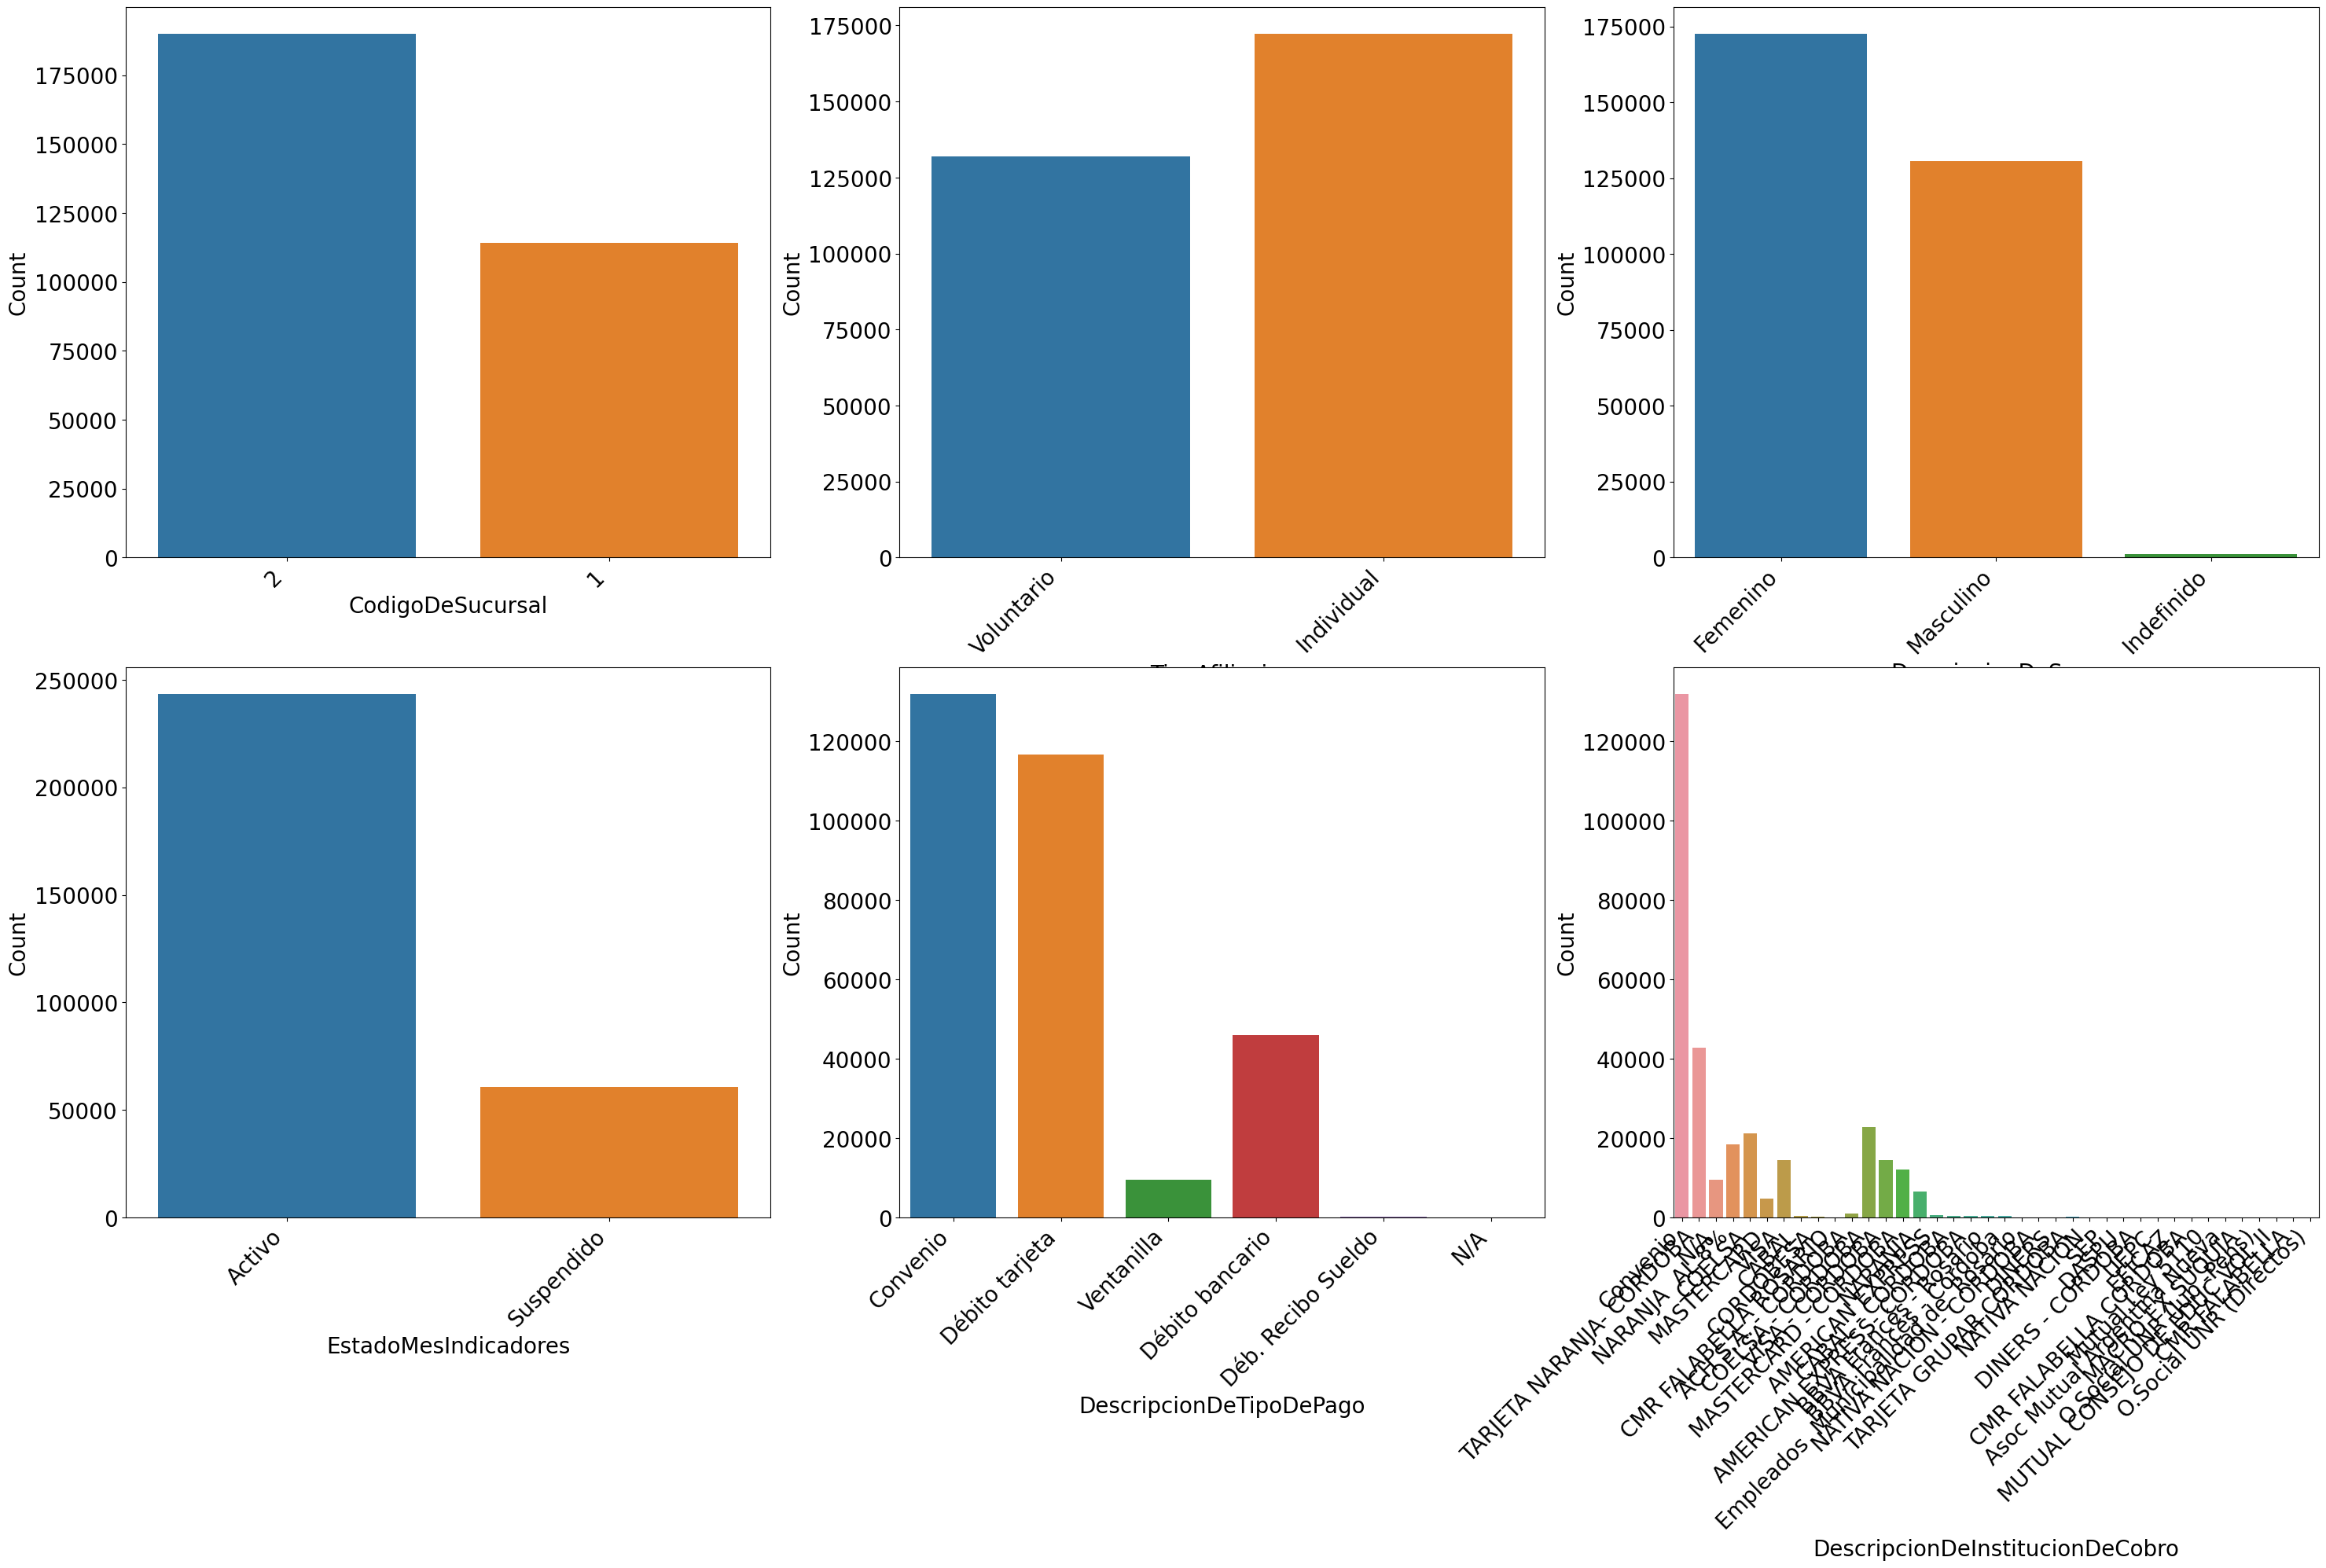

In [17]:
categorical_feature_func(cat_cols[0:6], df, 3)


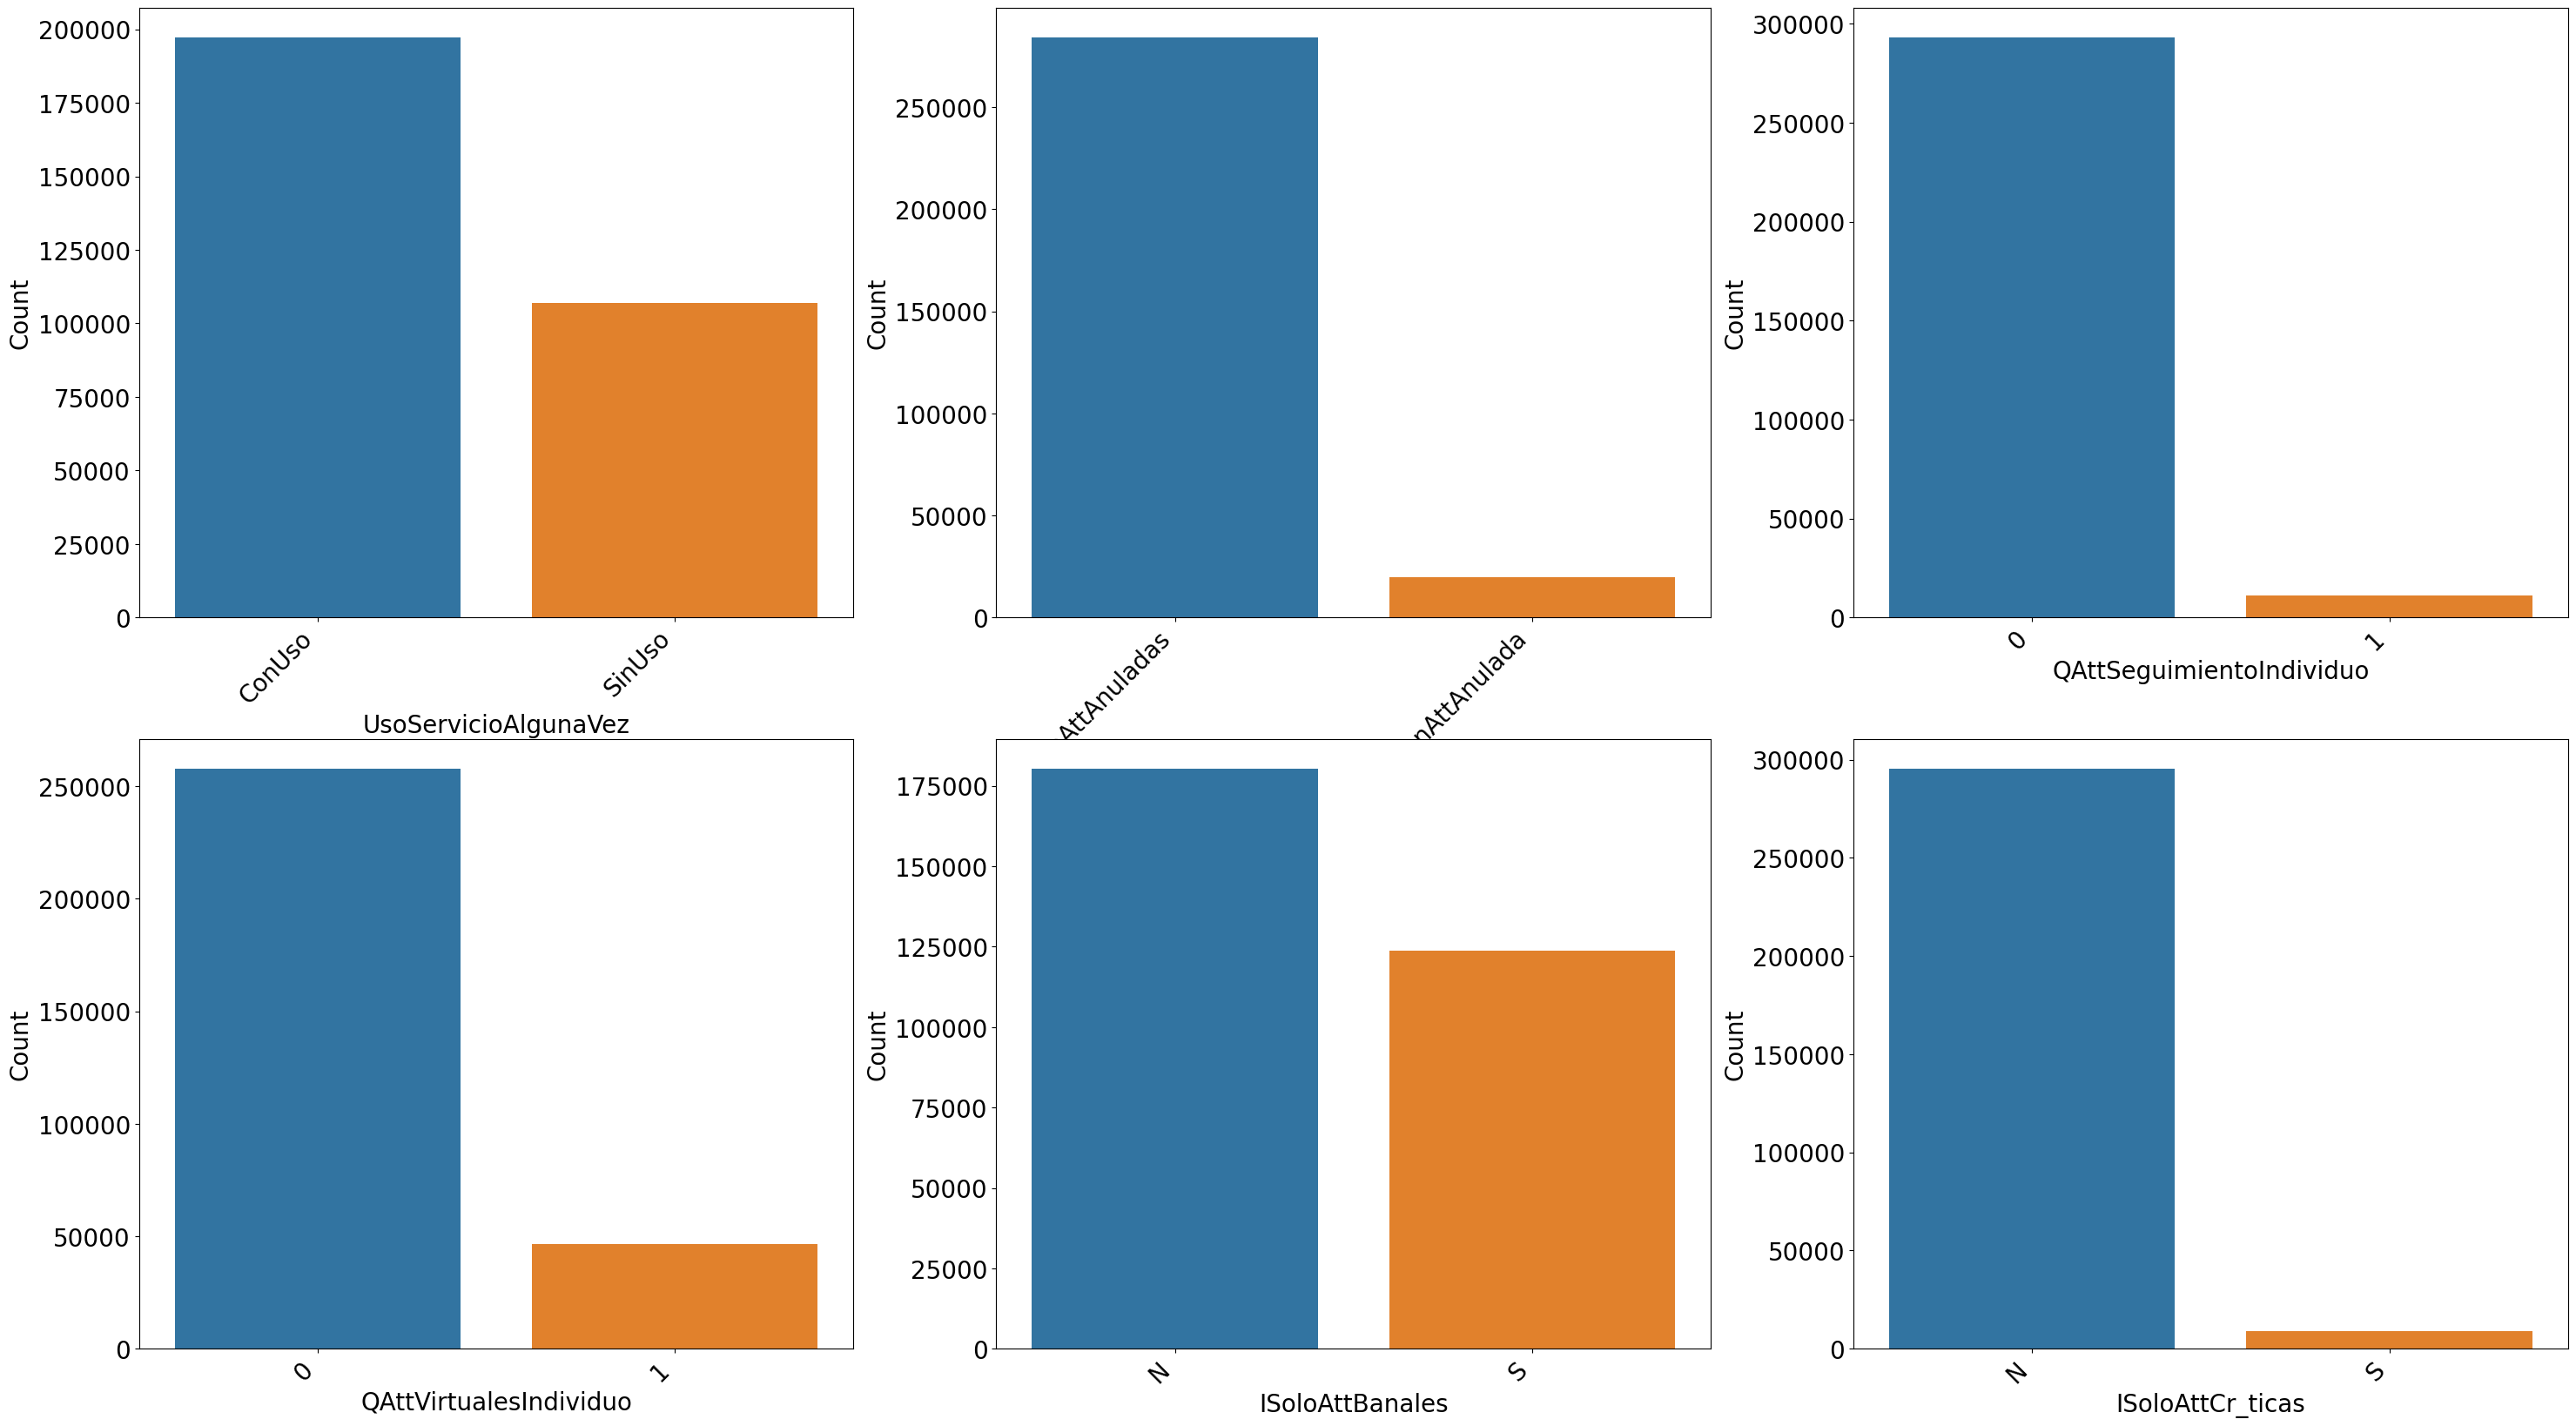

In [18]:
categorical_feature_func(cat_cols[6:12], df, 3)


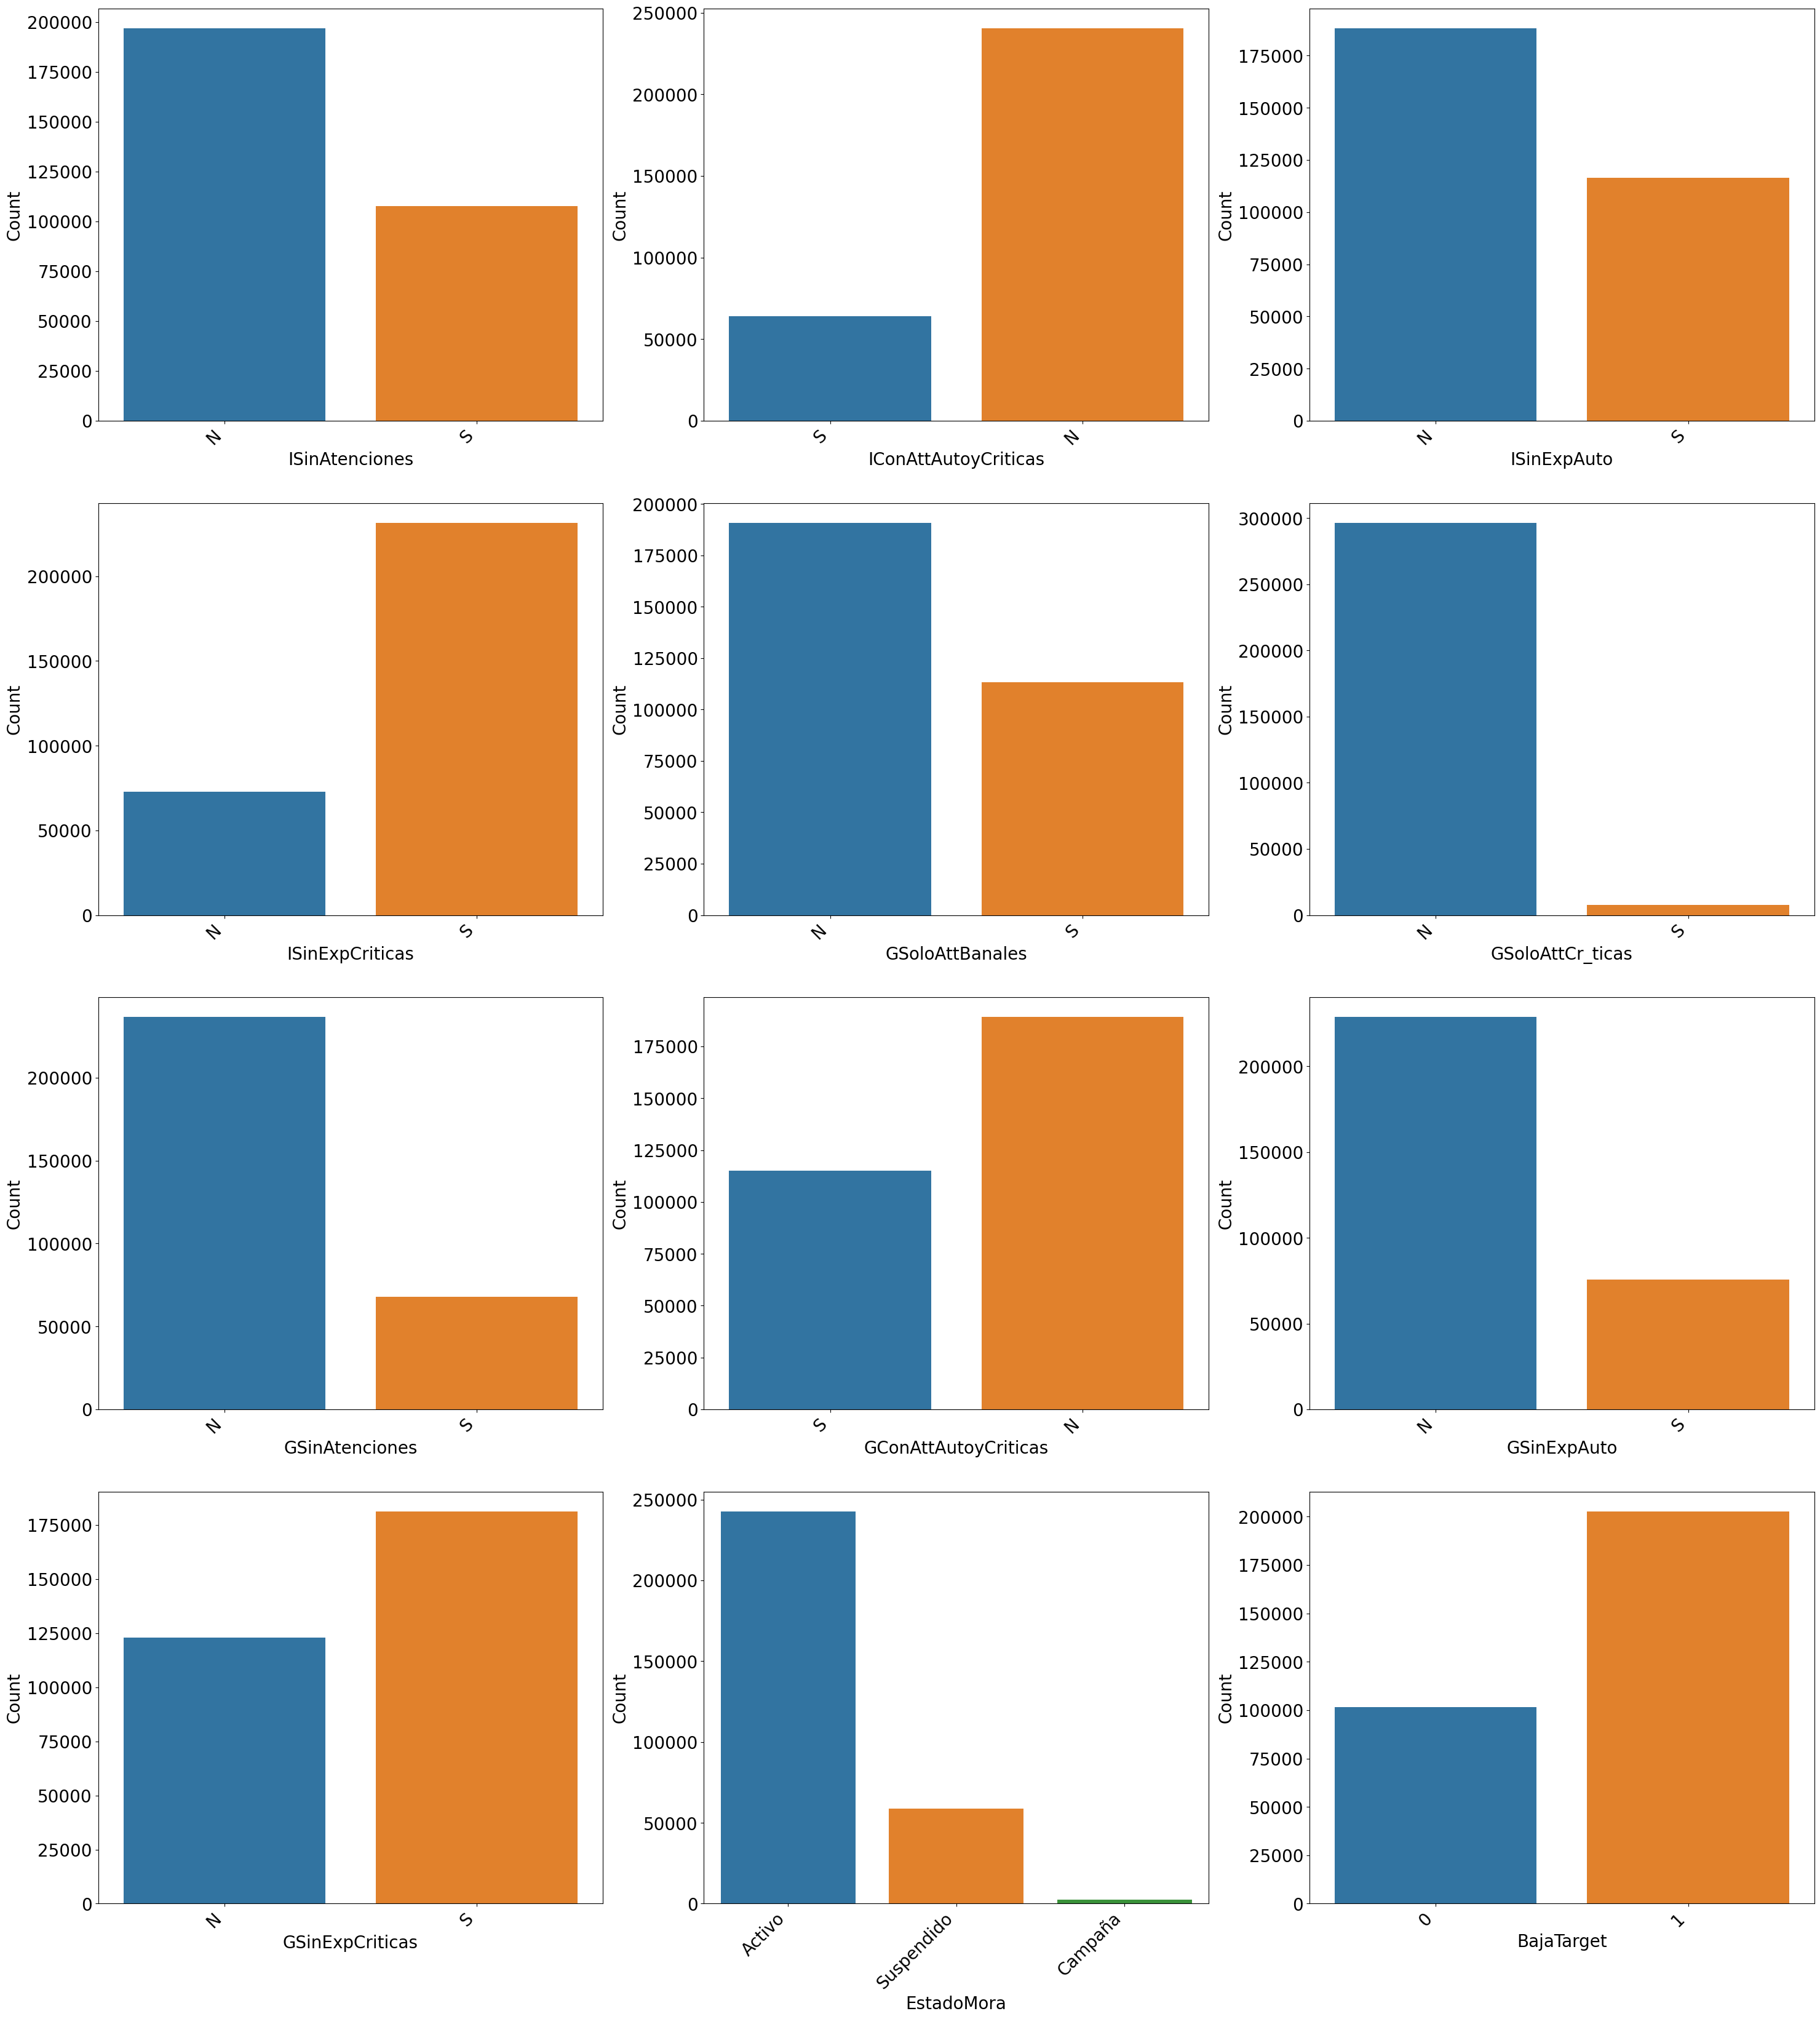

In [19]:
categorical_feature_func(cat_cols[12:], df, 3)


In [20]:
#Visualización bivariada de características categóricas
#relación entre cada variable categórica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def categorical_feature_func(cat_cols, cross_col, data, plot_columnas):

    plot_filas = math.ceil(len(cat_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(cat_cols):
            pd.crosstab(data[col],data[cross_col]).plot(kind="bar", rot=45, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(cat_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            pd.crosstab(data[col],data[cross_col]).plot( kind="bar", rot=45, ax = axs[axs_fila][axs_col])
            #sns.countplot( x=col,hue=cross_col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
           


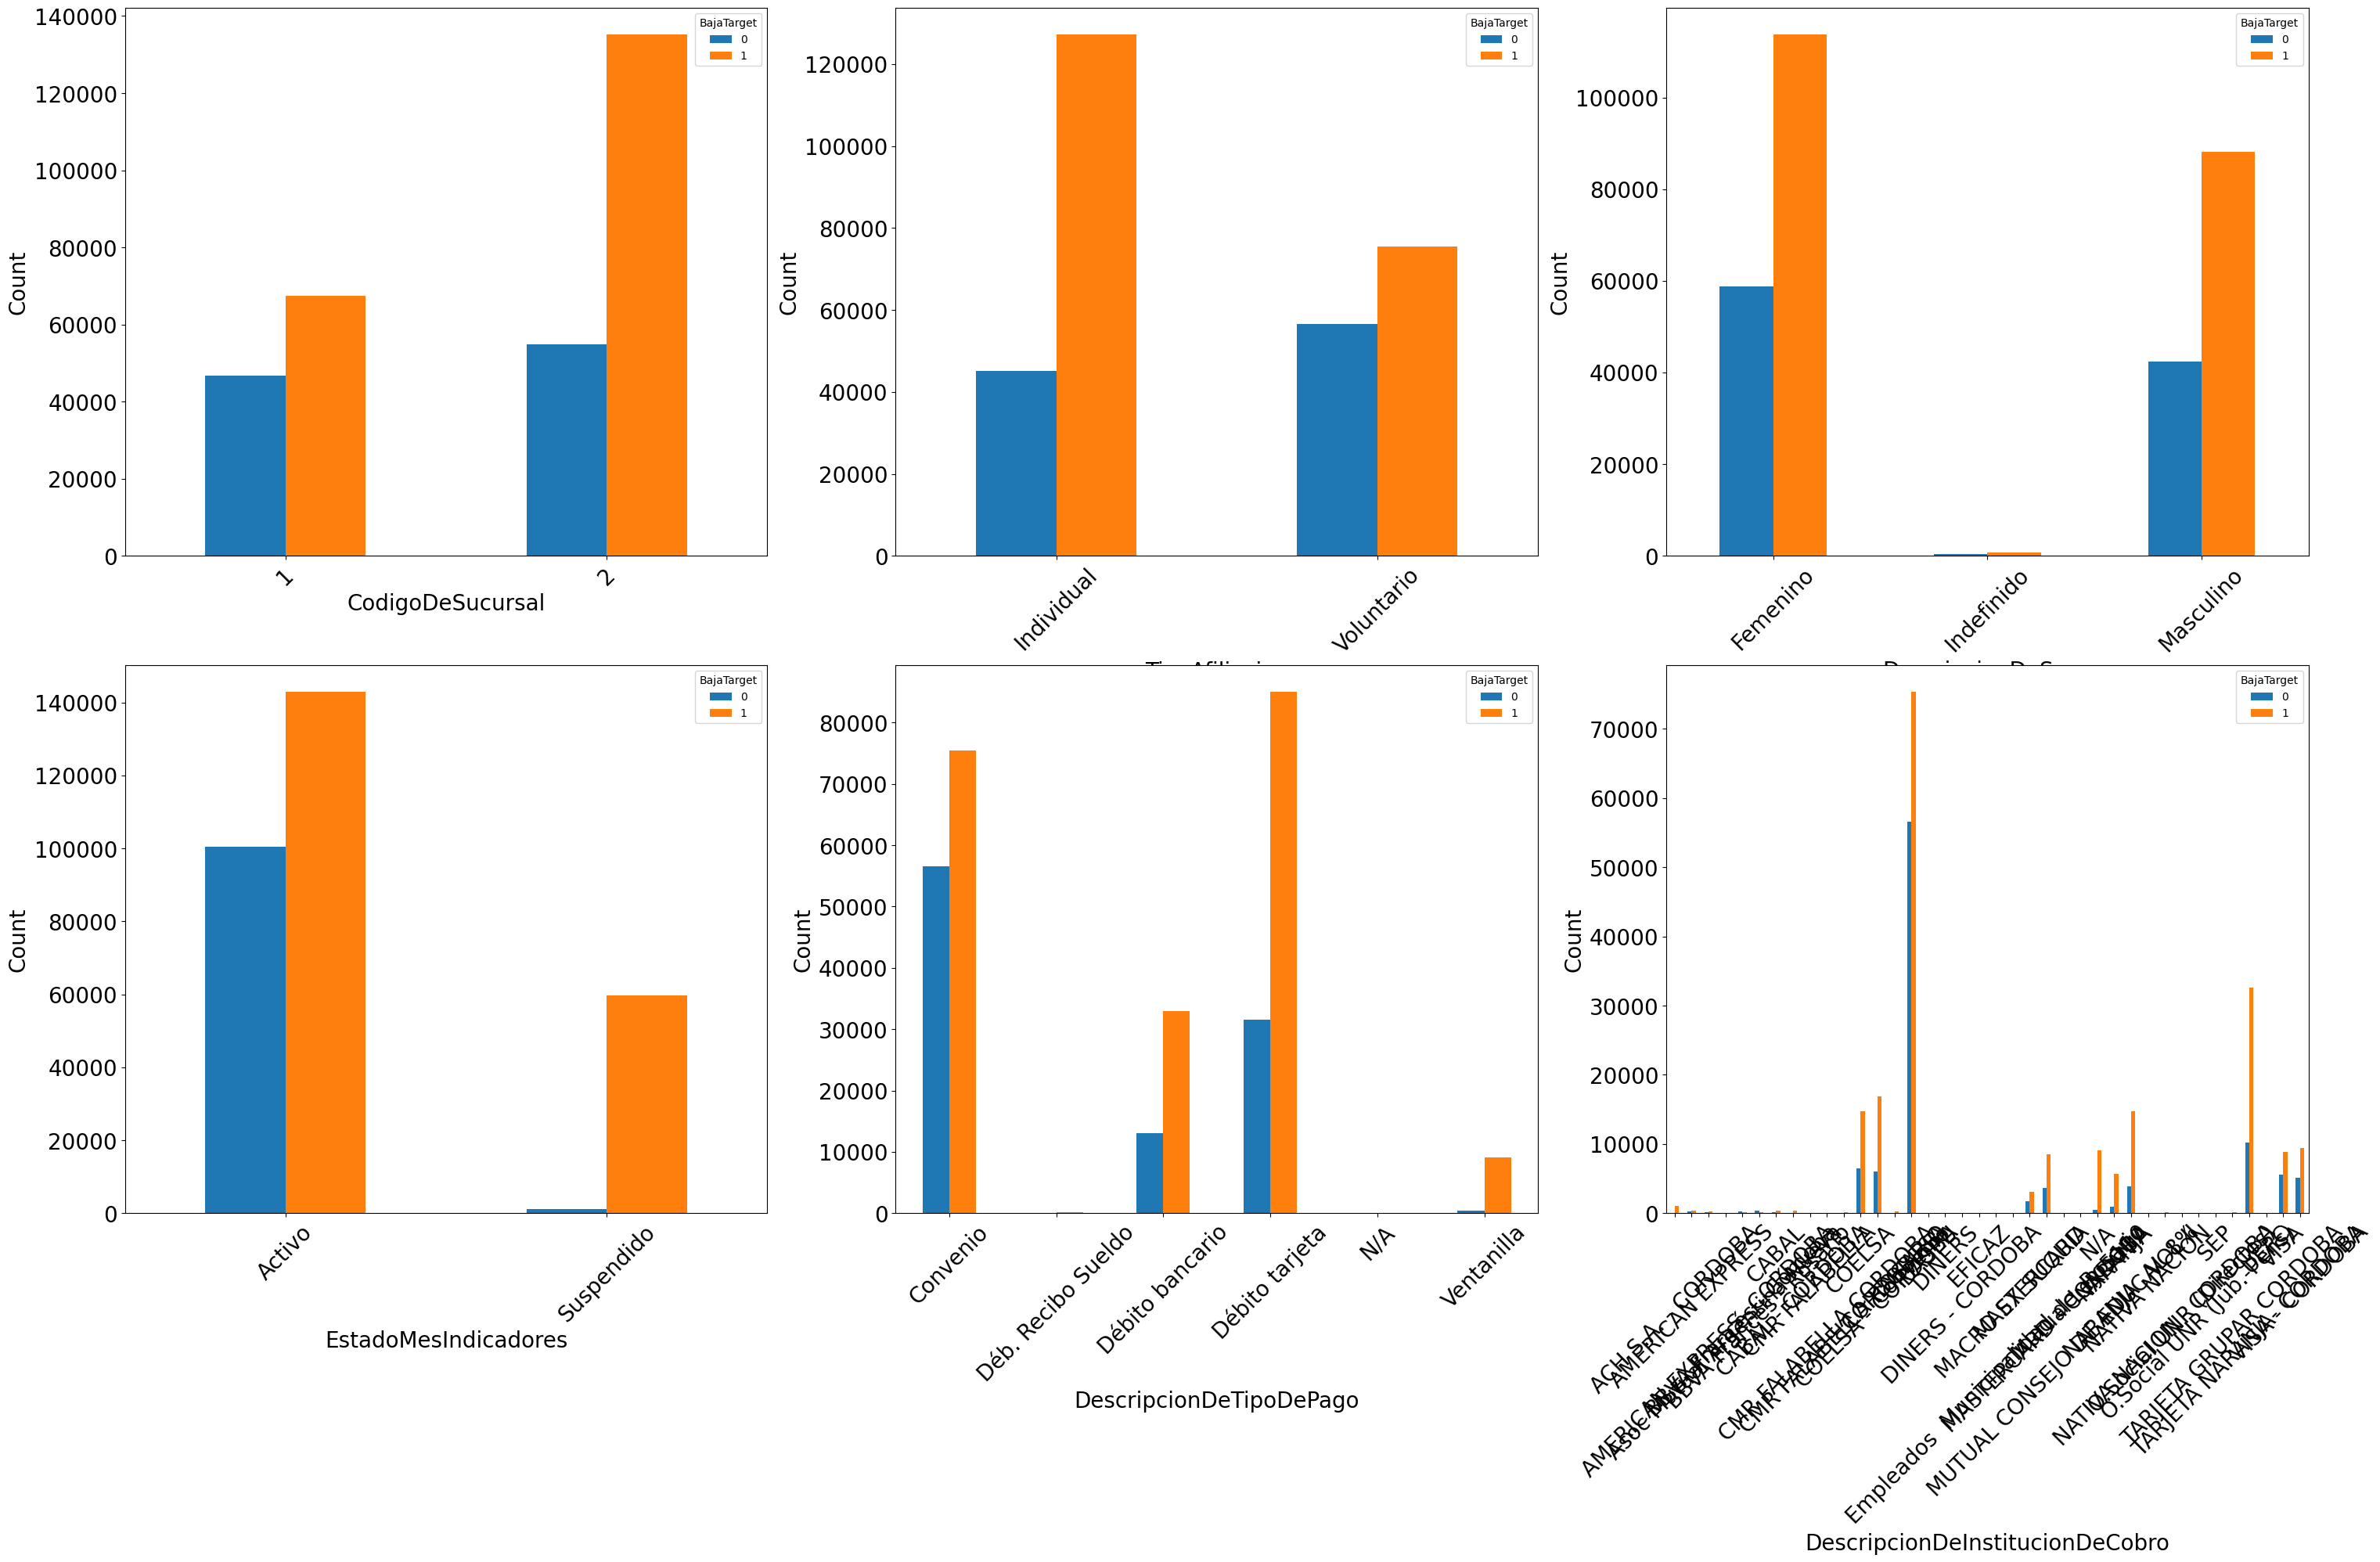

In [21]:
categorical_feature_func(cat_cols[0:6], 'BajaTarget', df, 3)

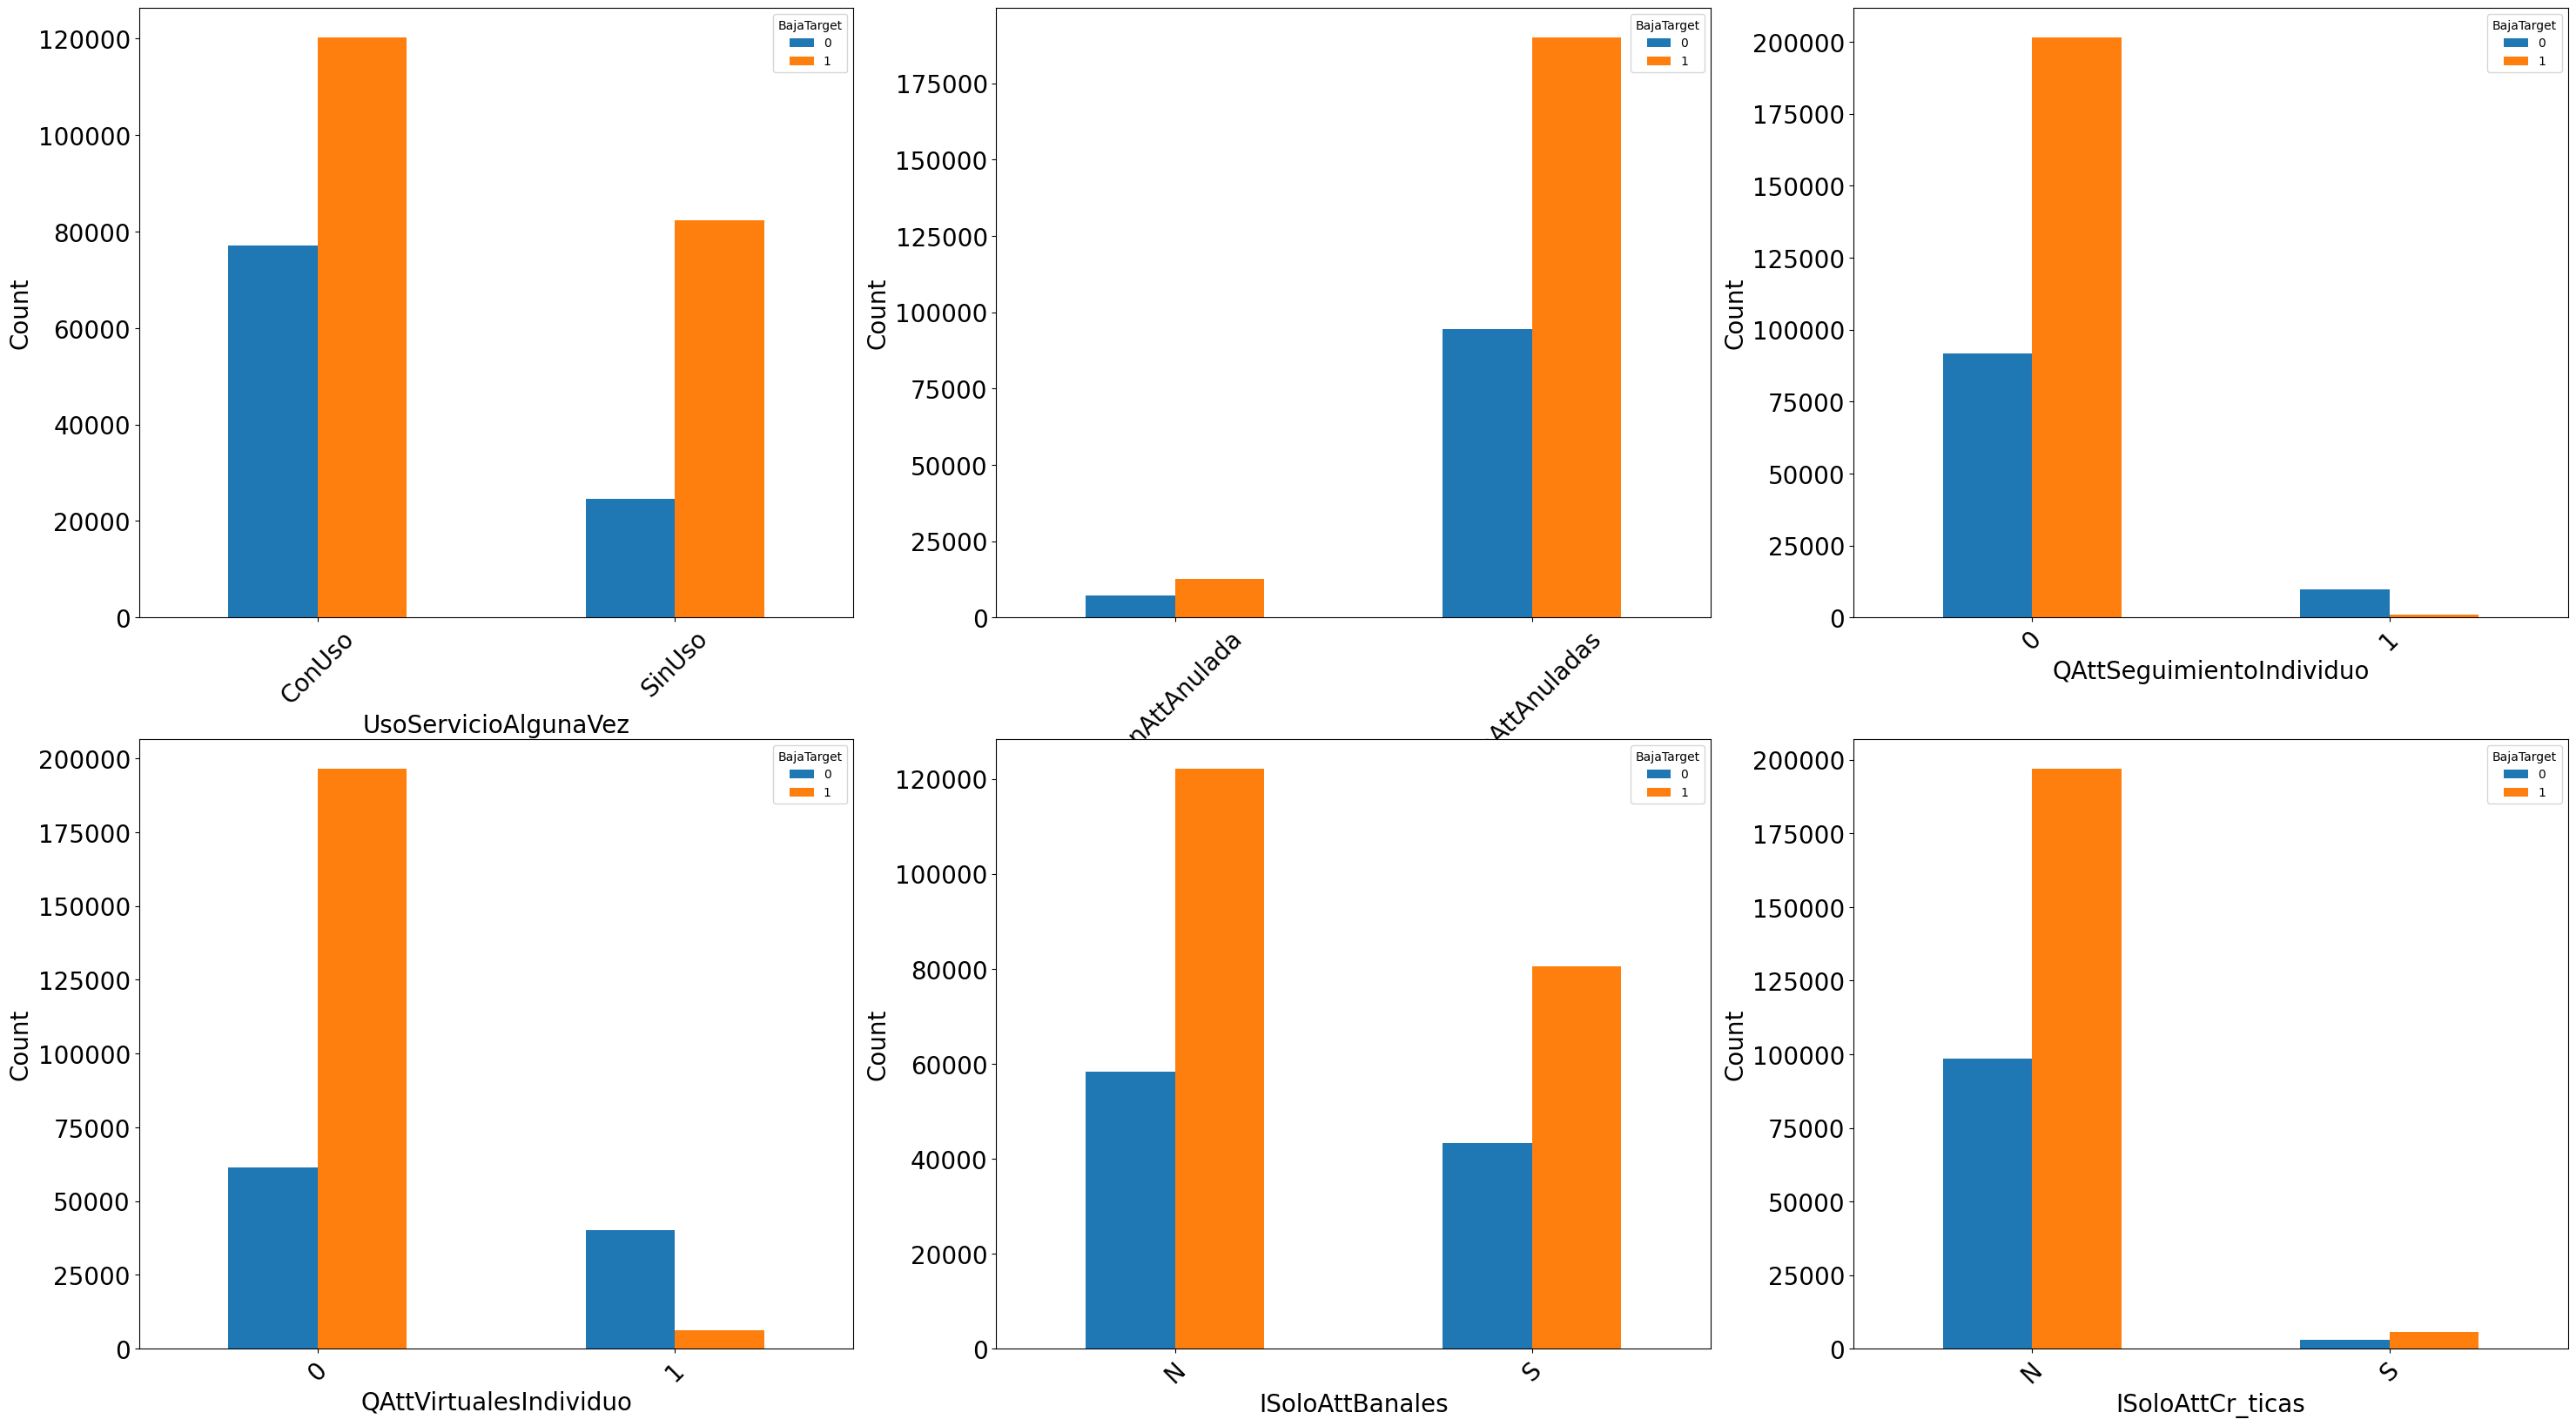

In [22]:
categorical_feature_func(cat_cols[6:12], 'BajaTarget', df, 3)

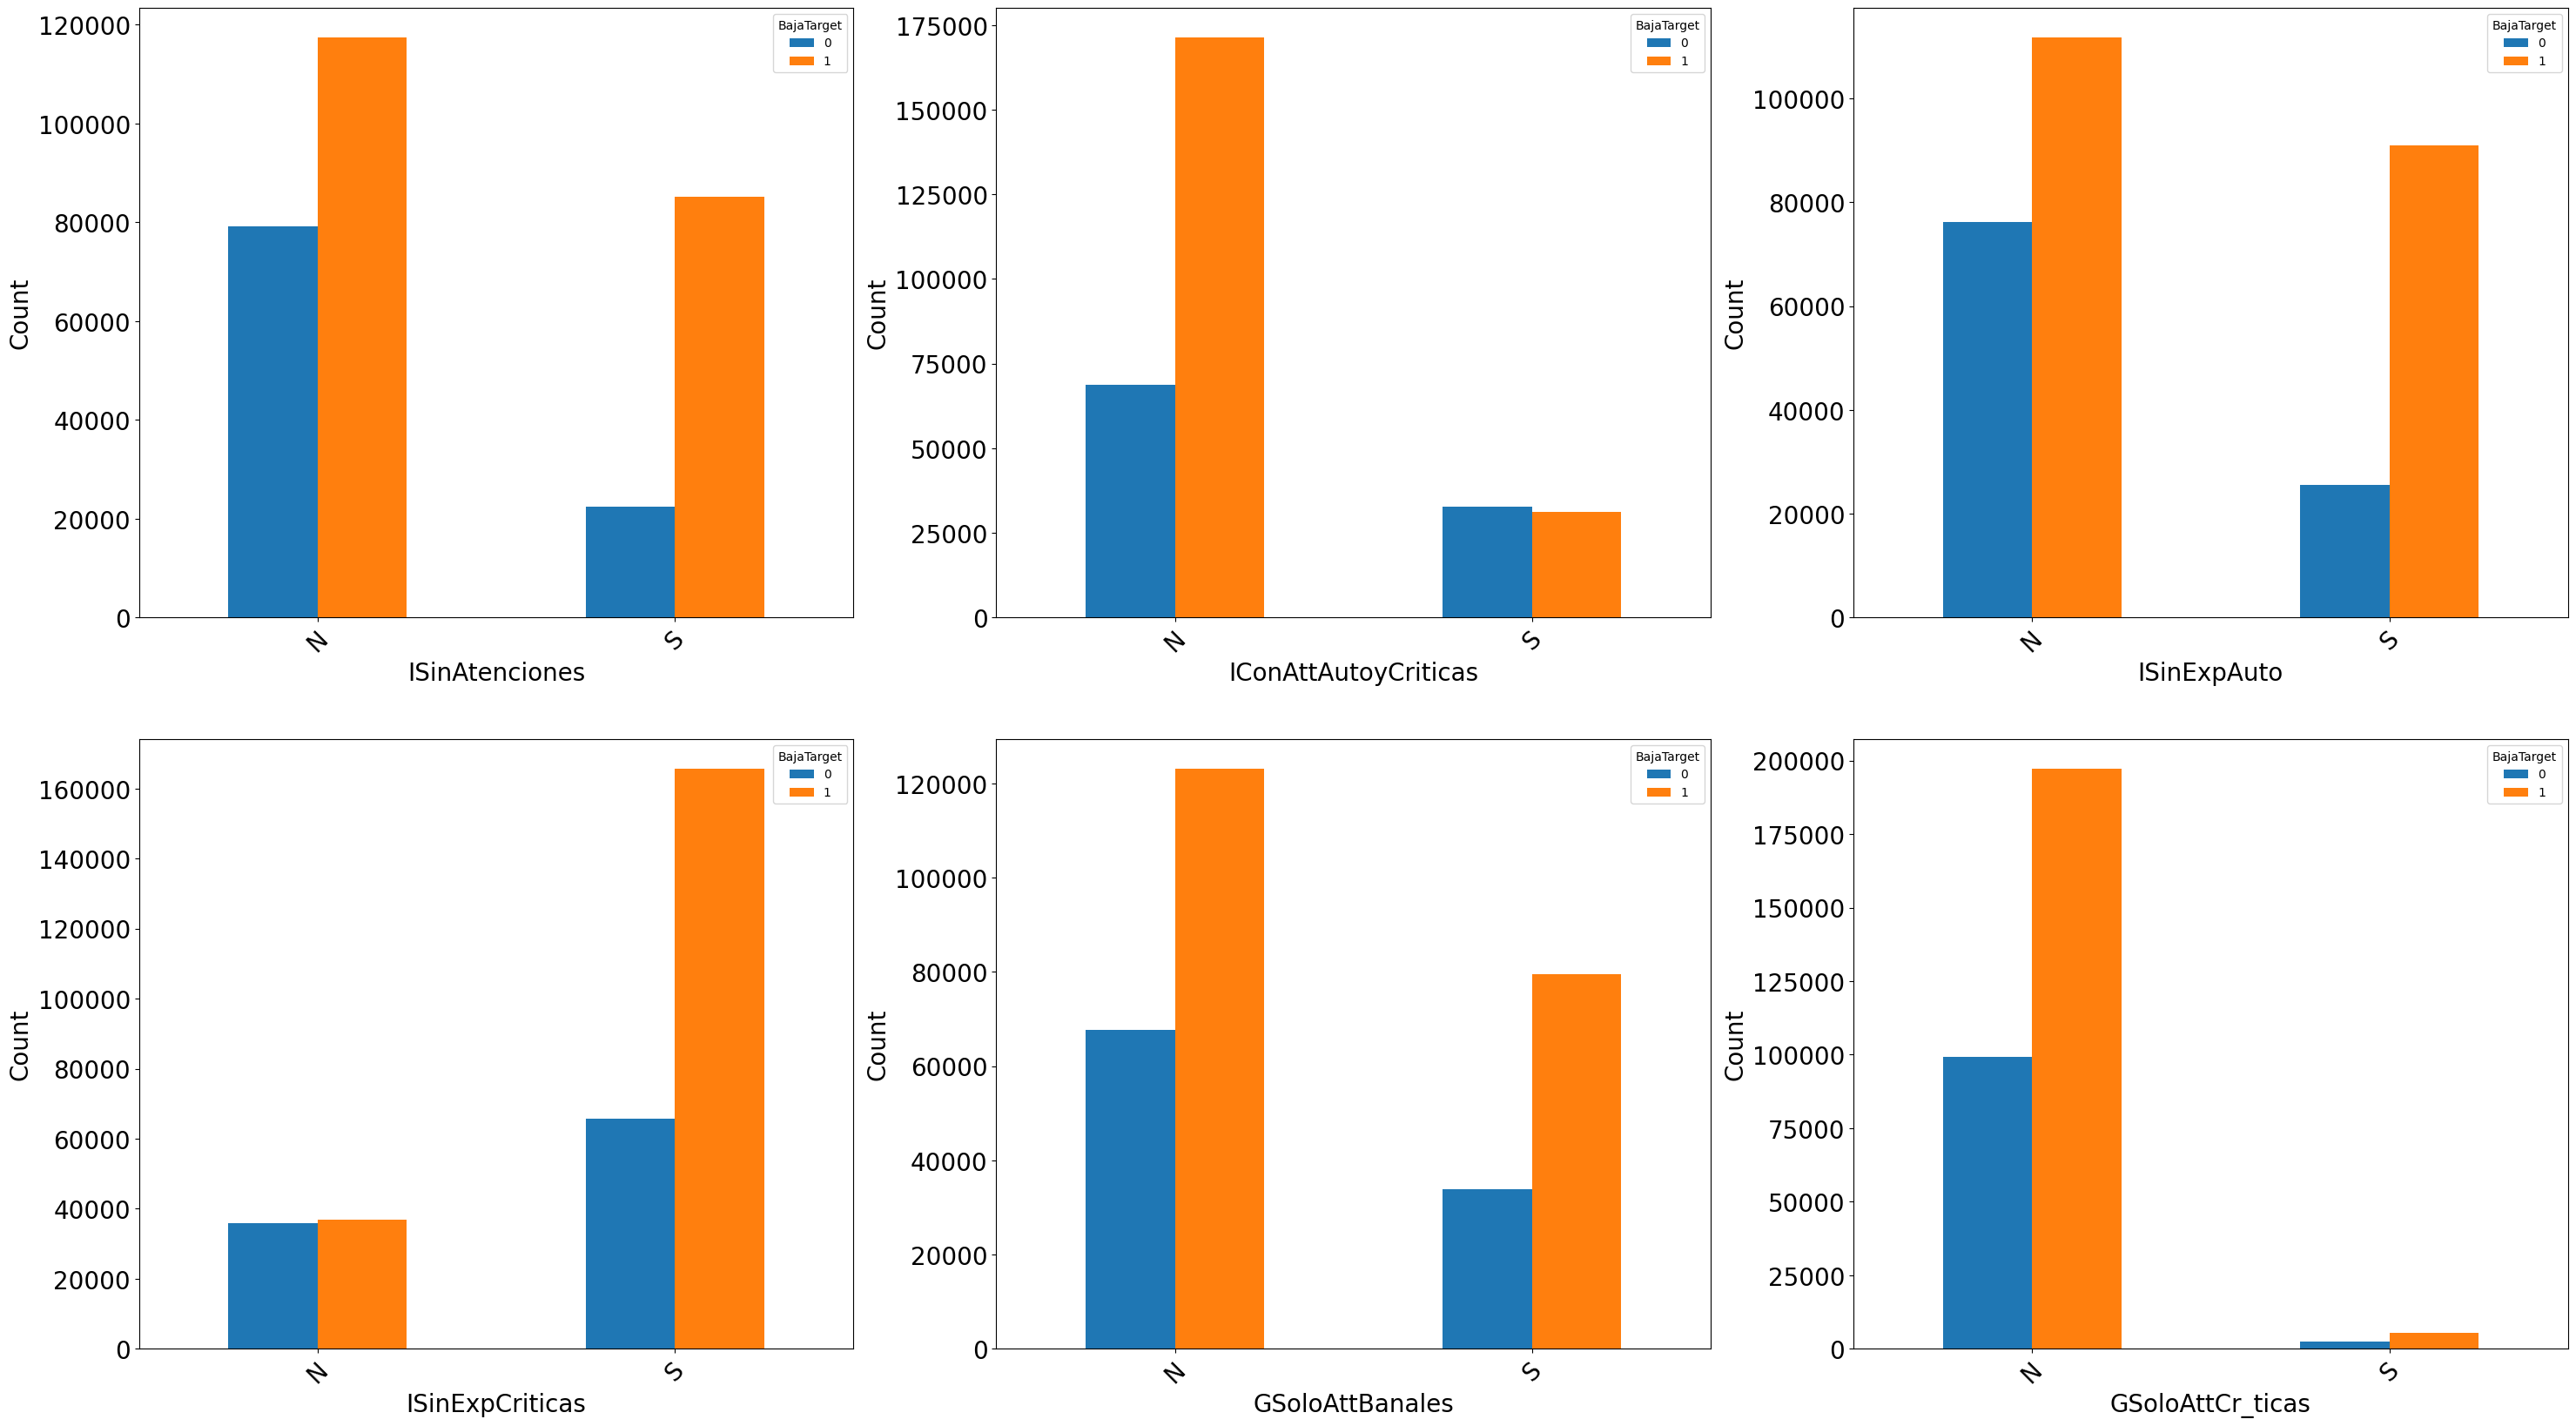

In [23]:
categorical_feature_func(cat_cols[12:18], 'BajaTarget', df, 3)

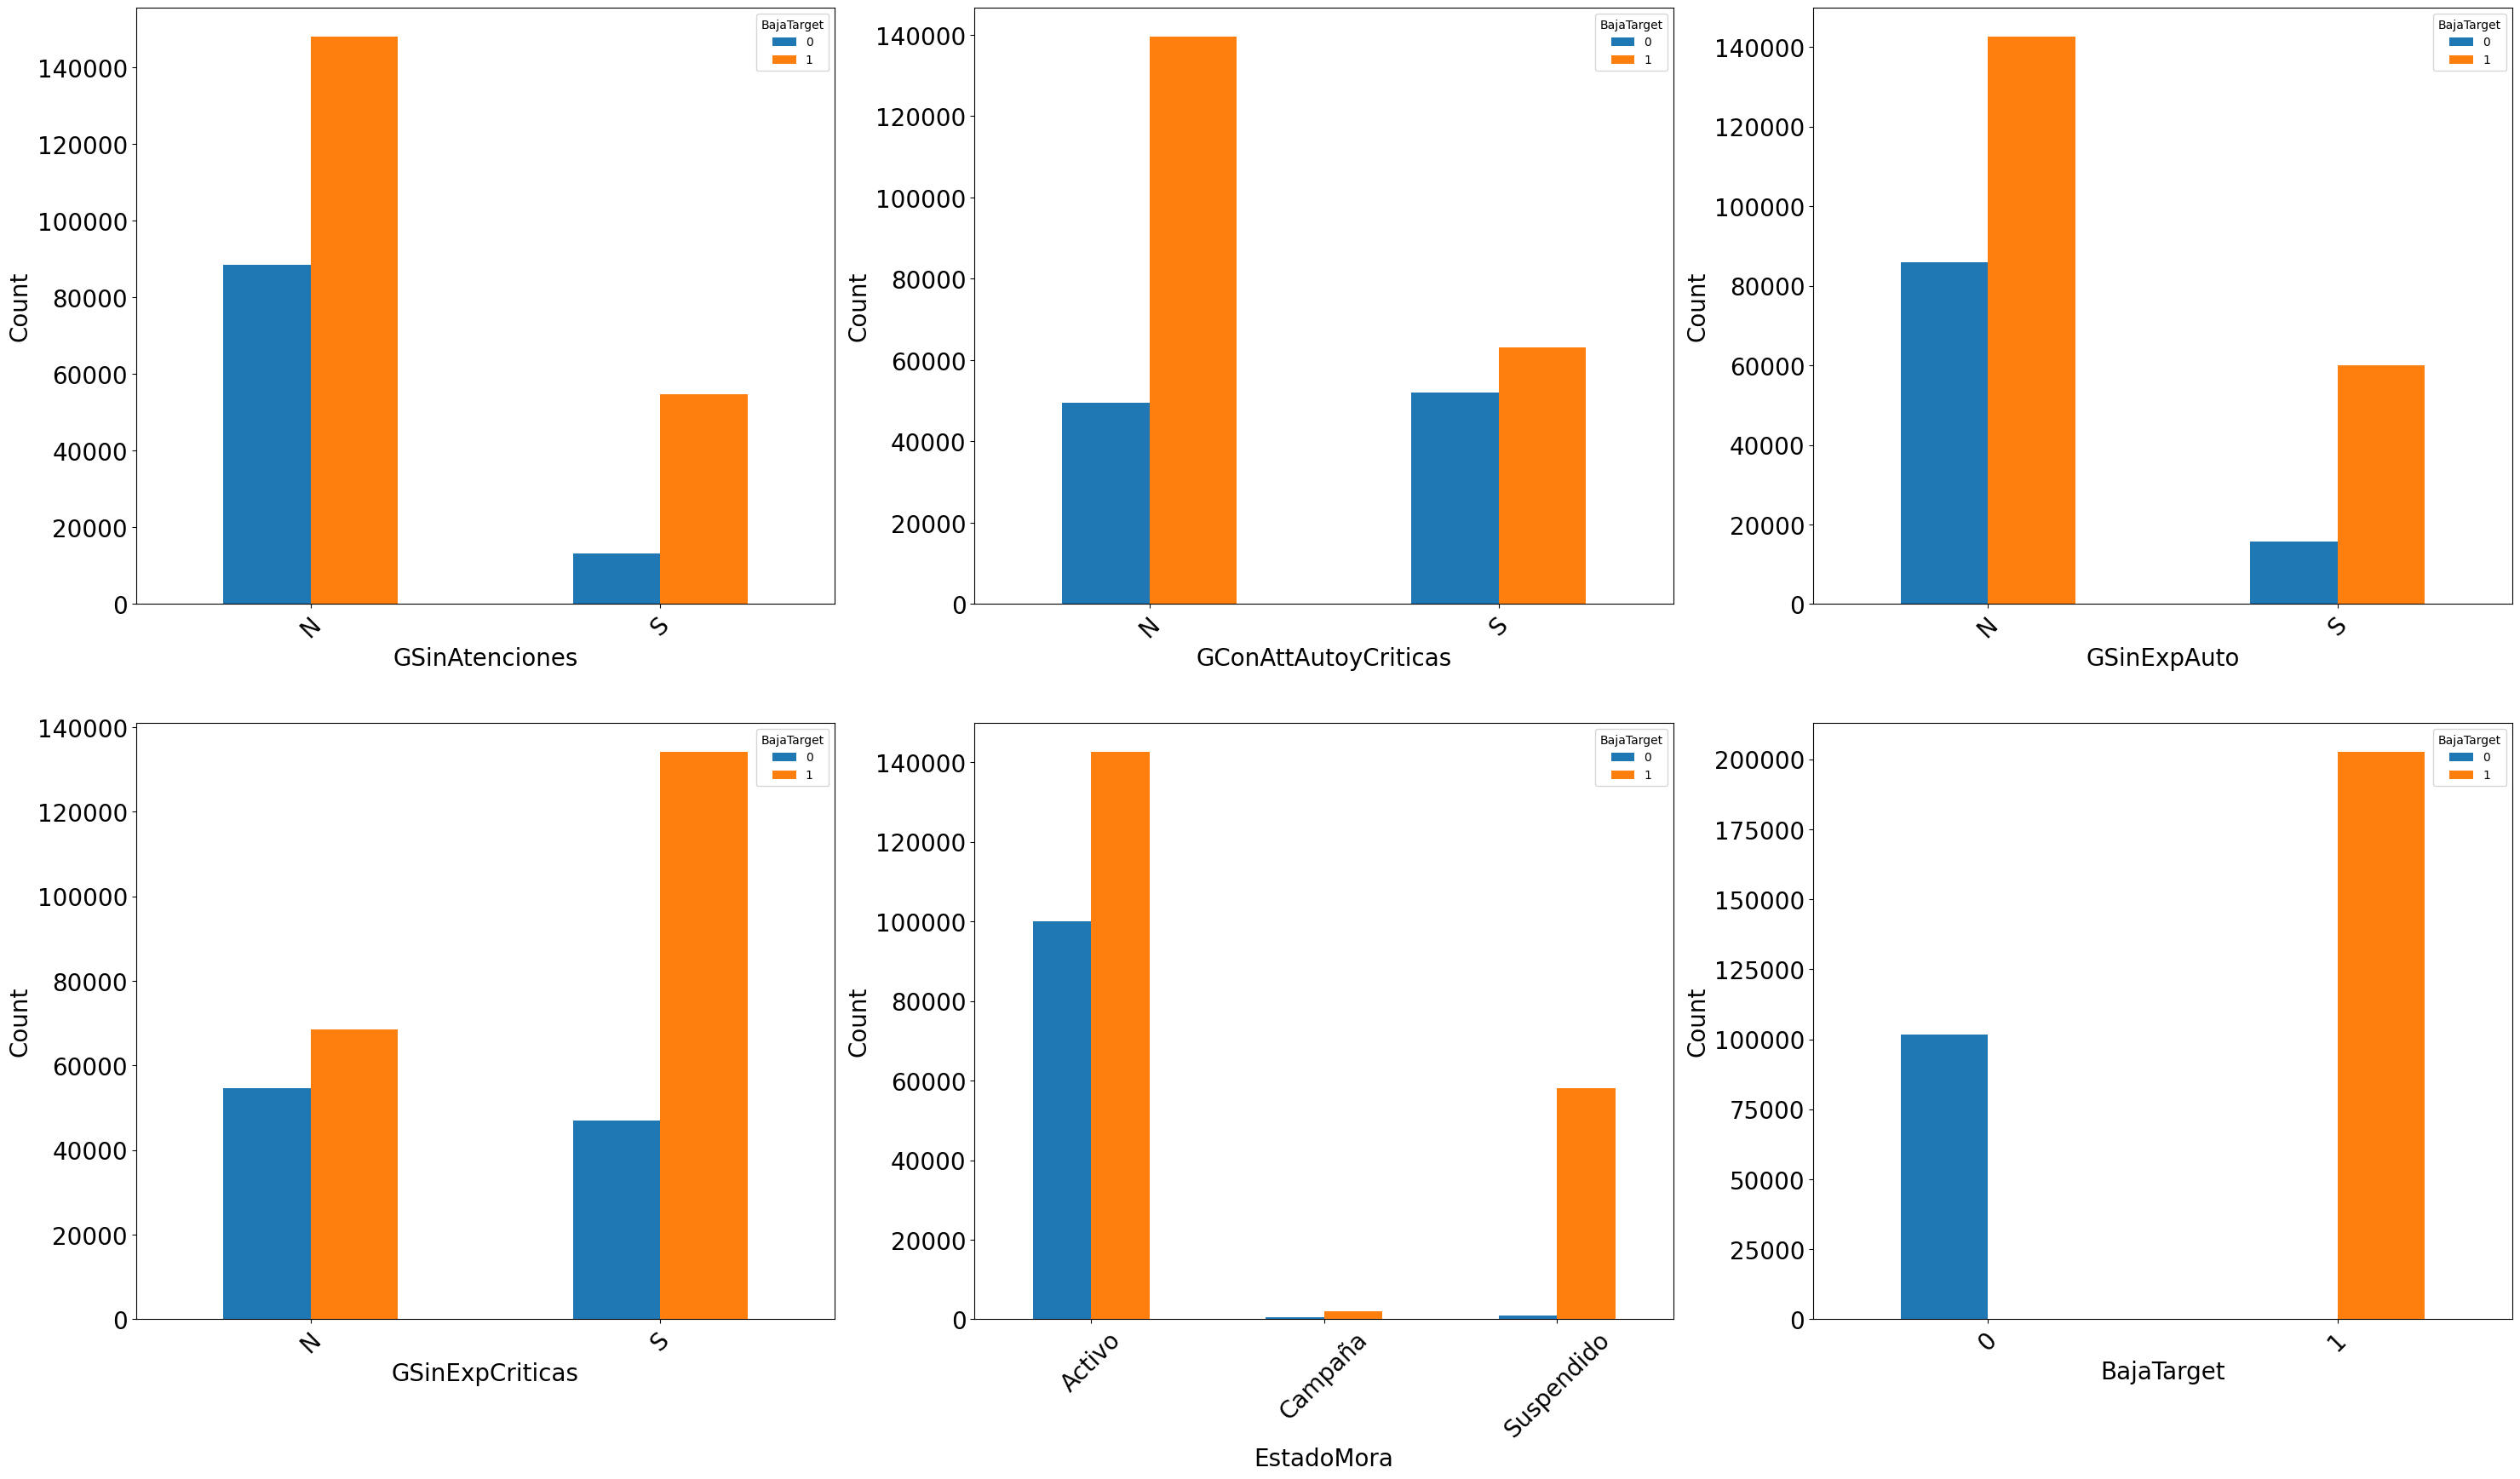

In [24]:
categorical_feature_func(cat_cols[18:], 'BajaTarget', df, 3)

In [25]:
# Univariate visualization of numerical features
def numeric_features_func(num_cols, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.histplot(x=col,data=data, kde=True, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.histplot(x=col,data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    plt.tight_layout()
    

c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constru

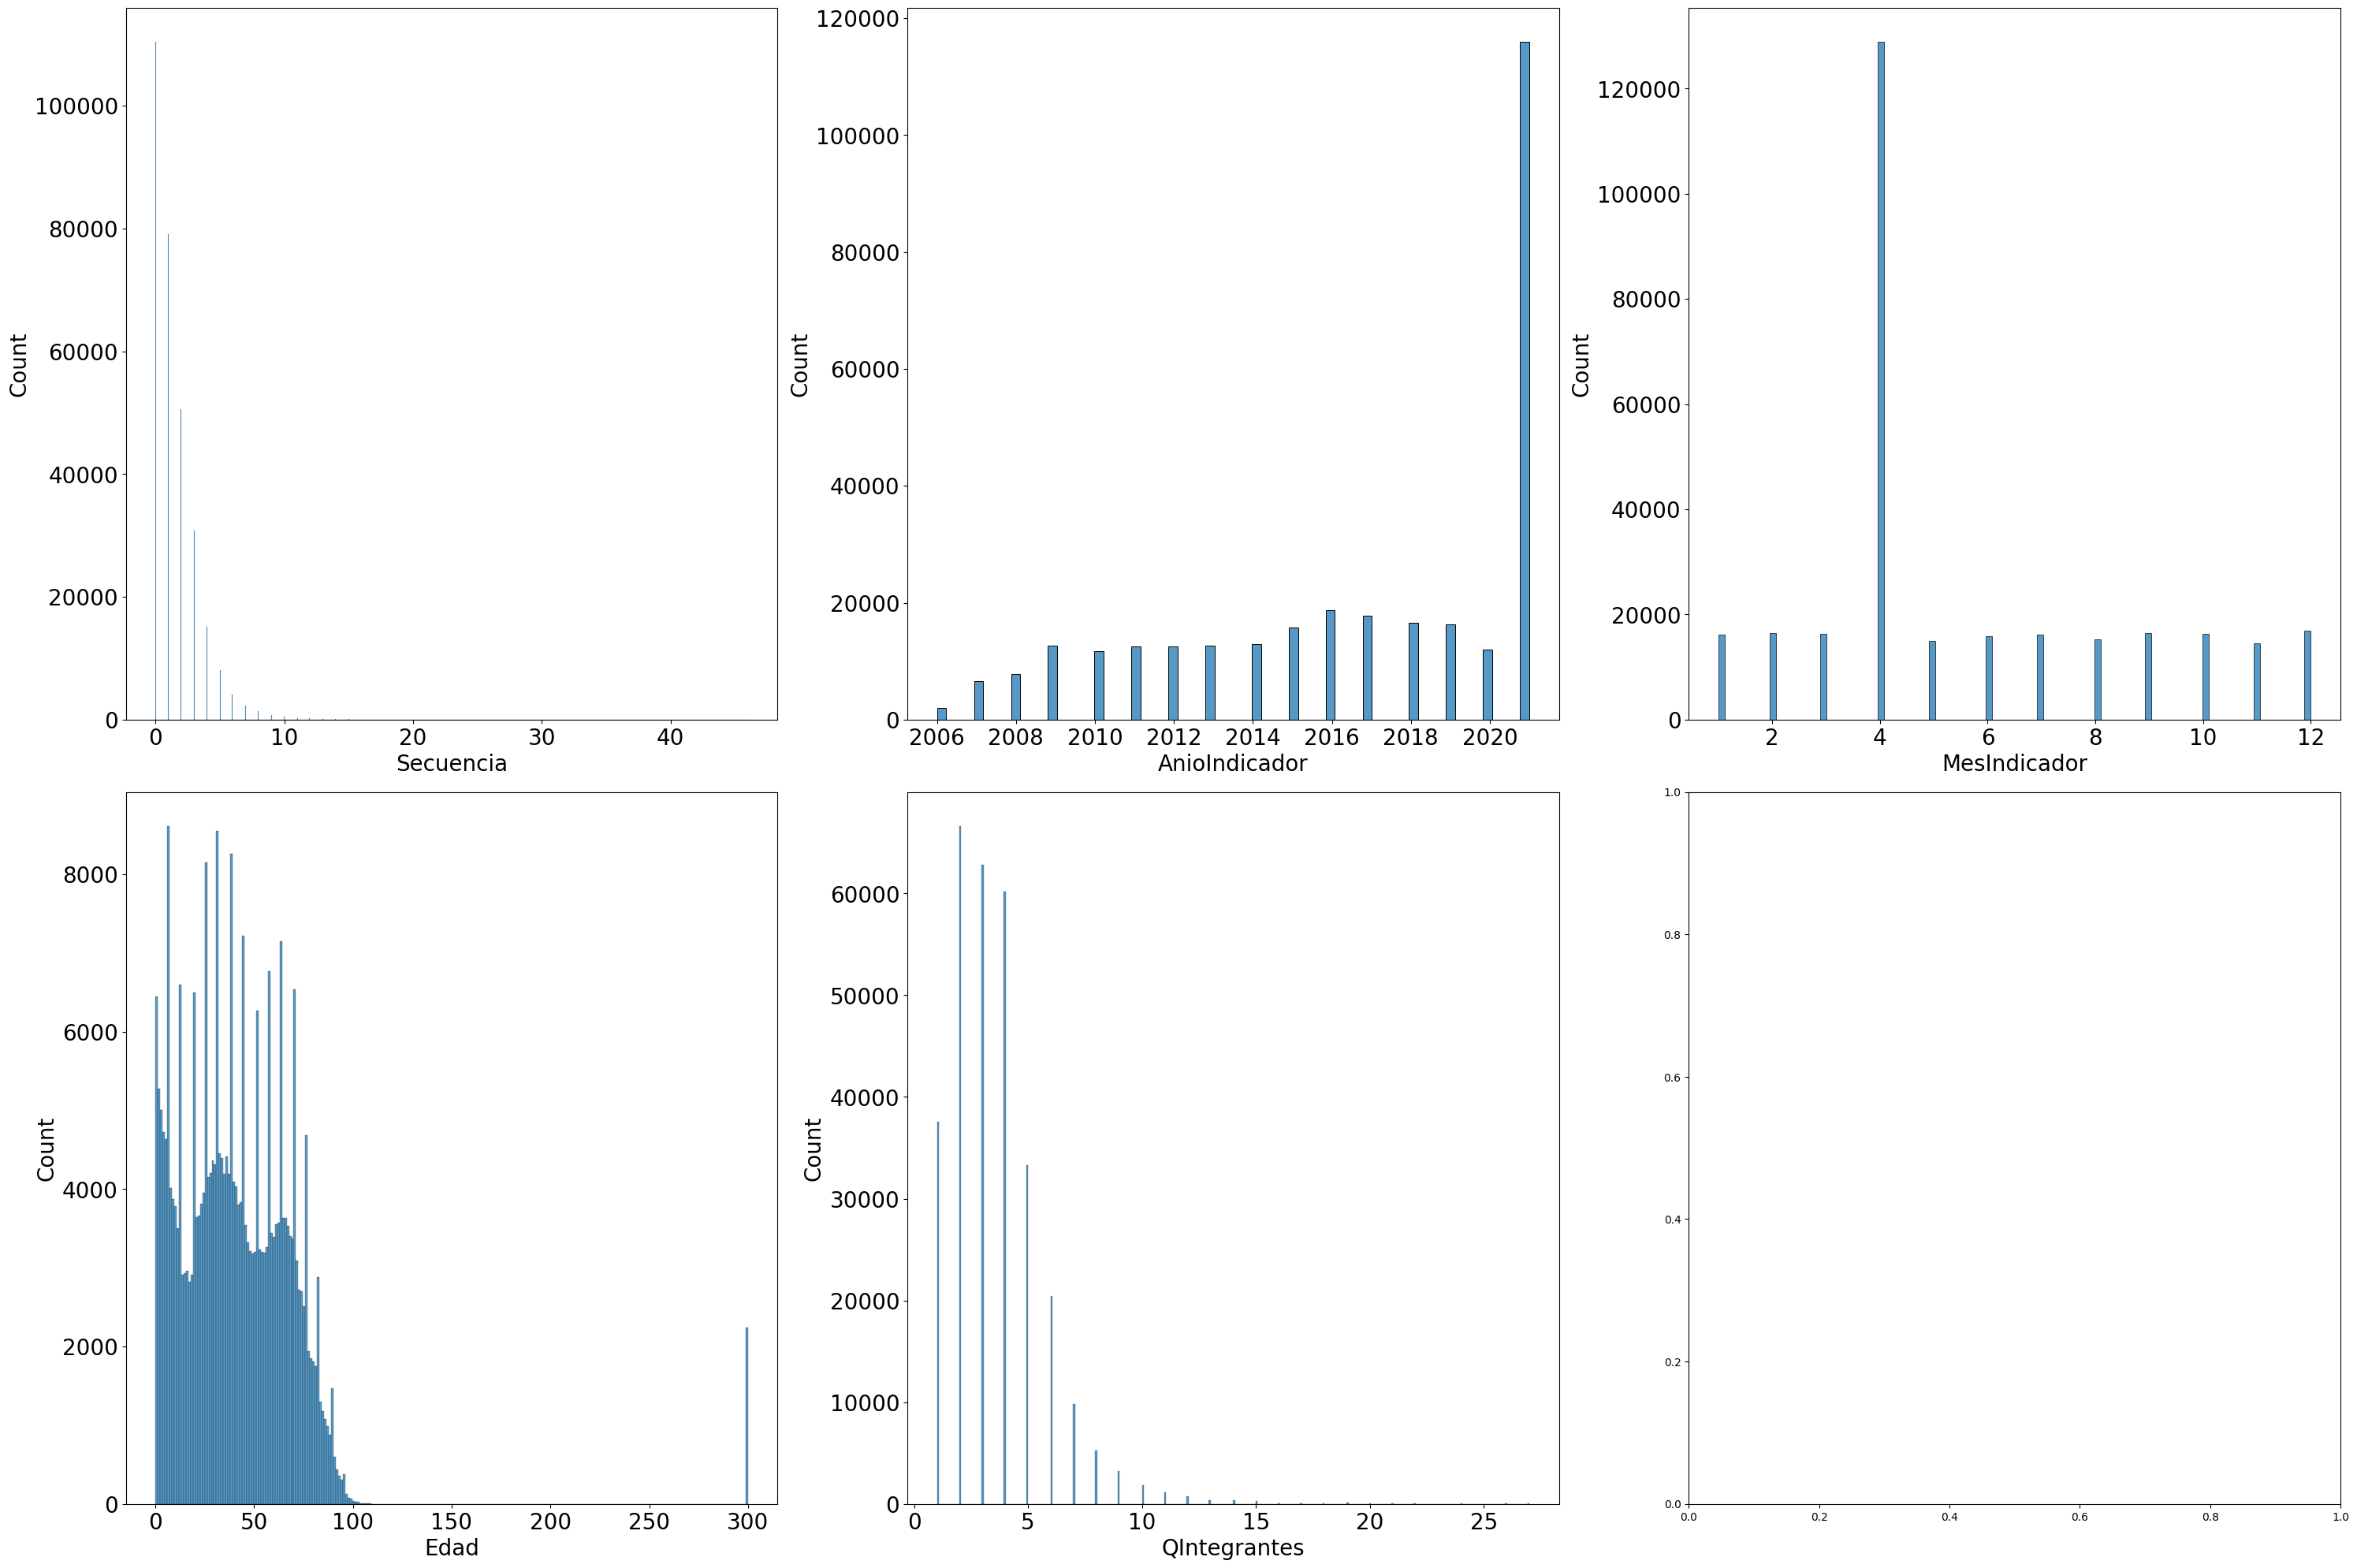

In [26]:
numeric_features_func(num_cols[0:5], df, 3)

c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constru

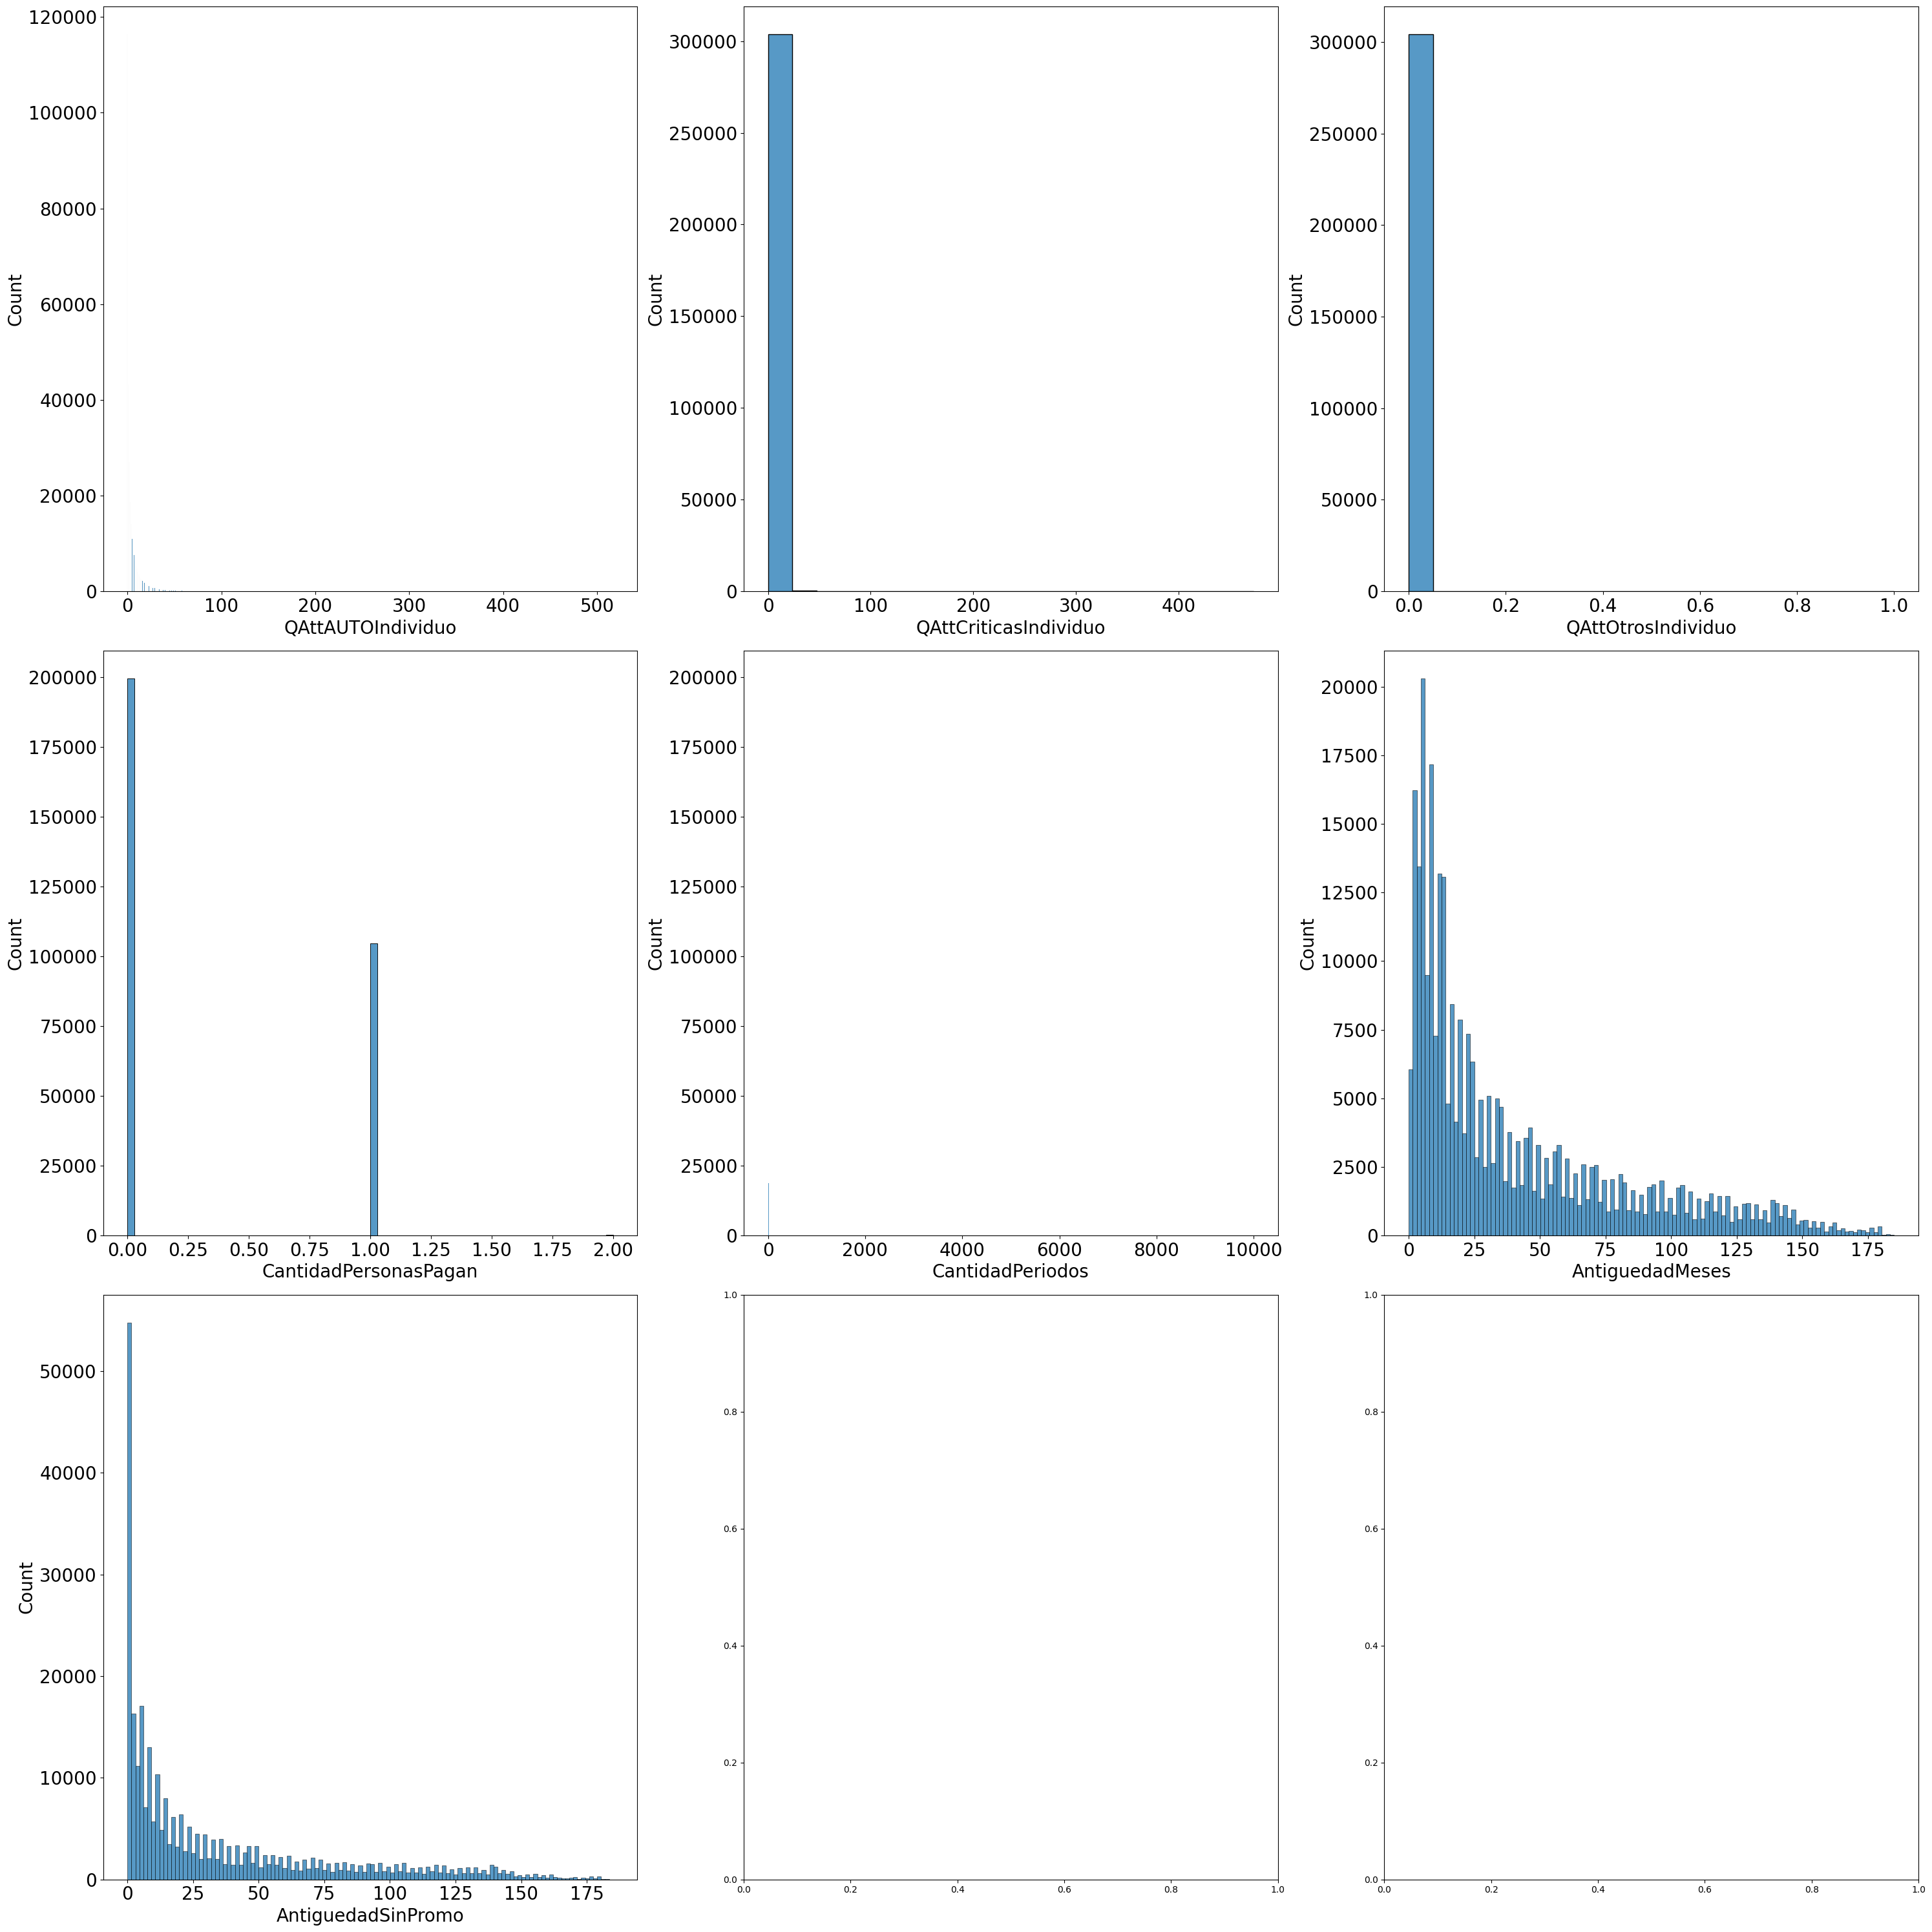

In [27]:
numeric_features_func(num_cols[5:], df, 3)

In [28]:
#Visualización bivariada de características numéricas
#relación entre cada variable numérica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def numeric_features_func(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    



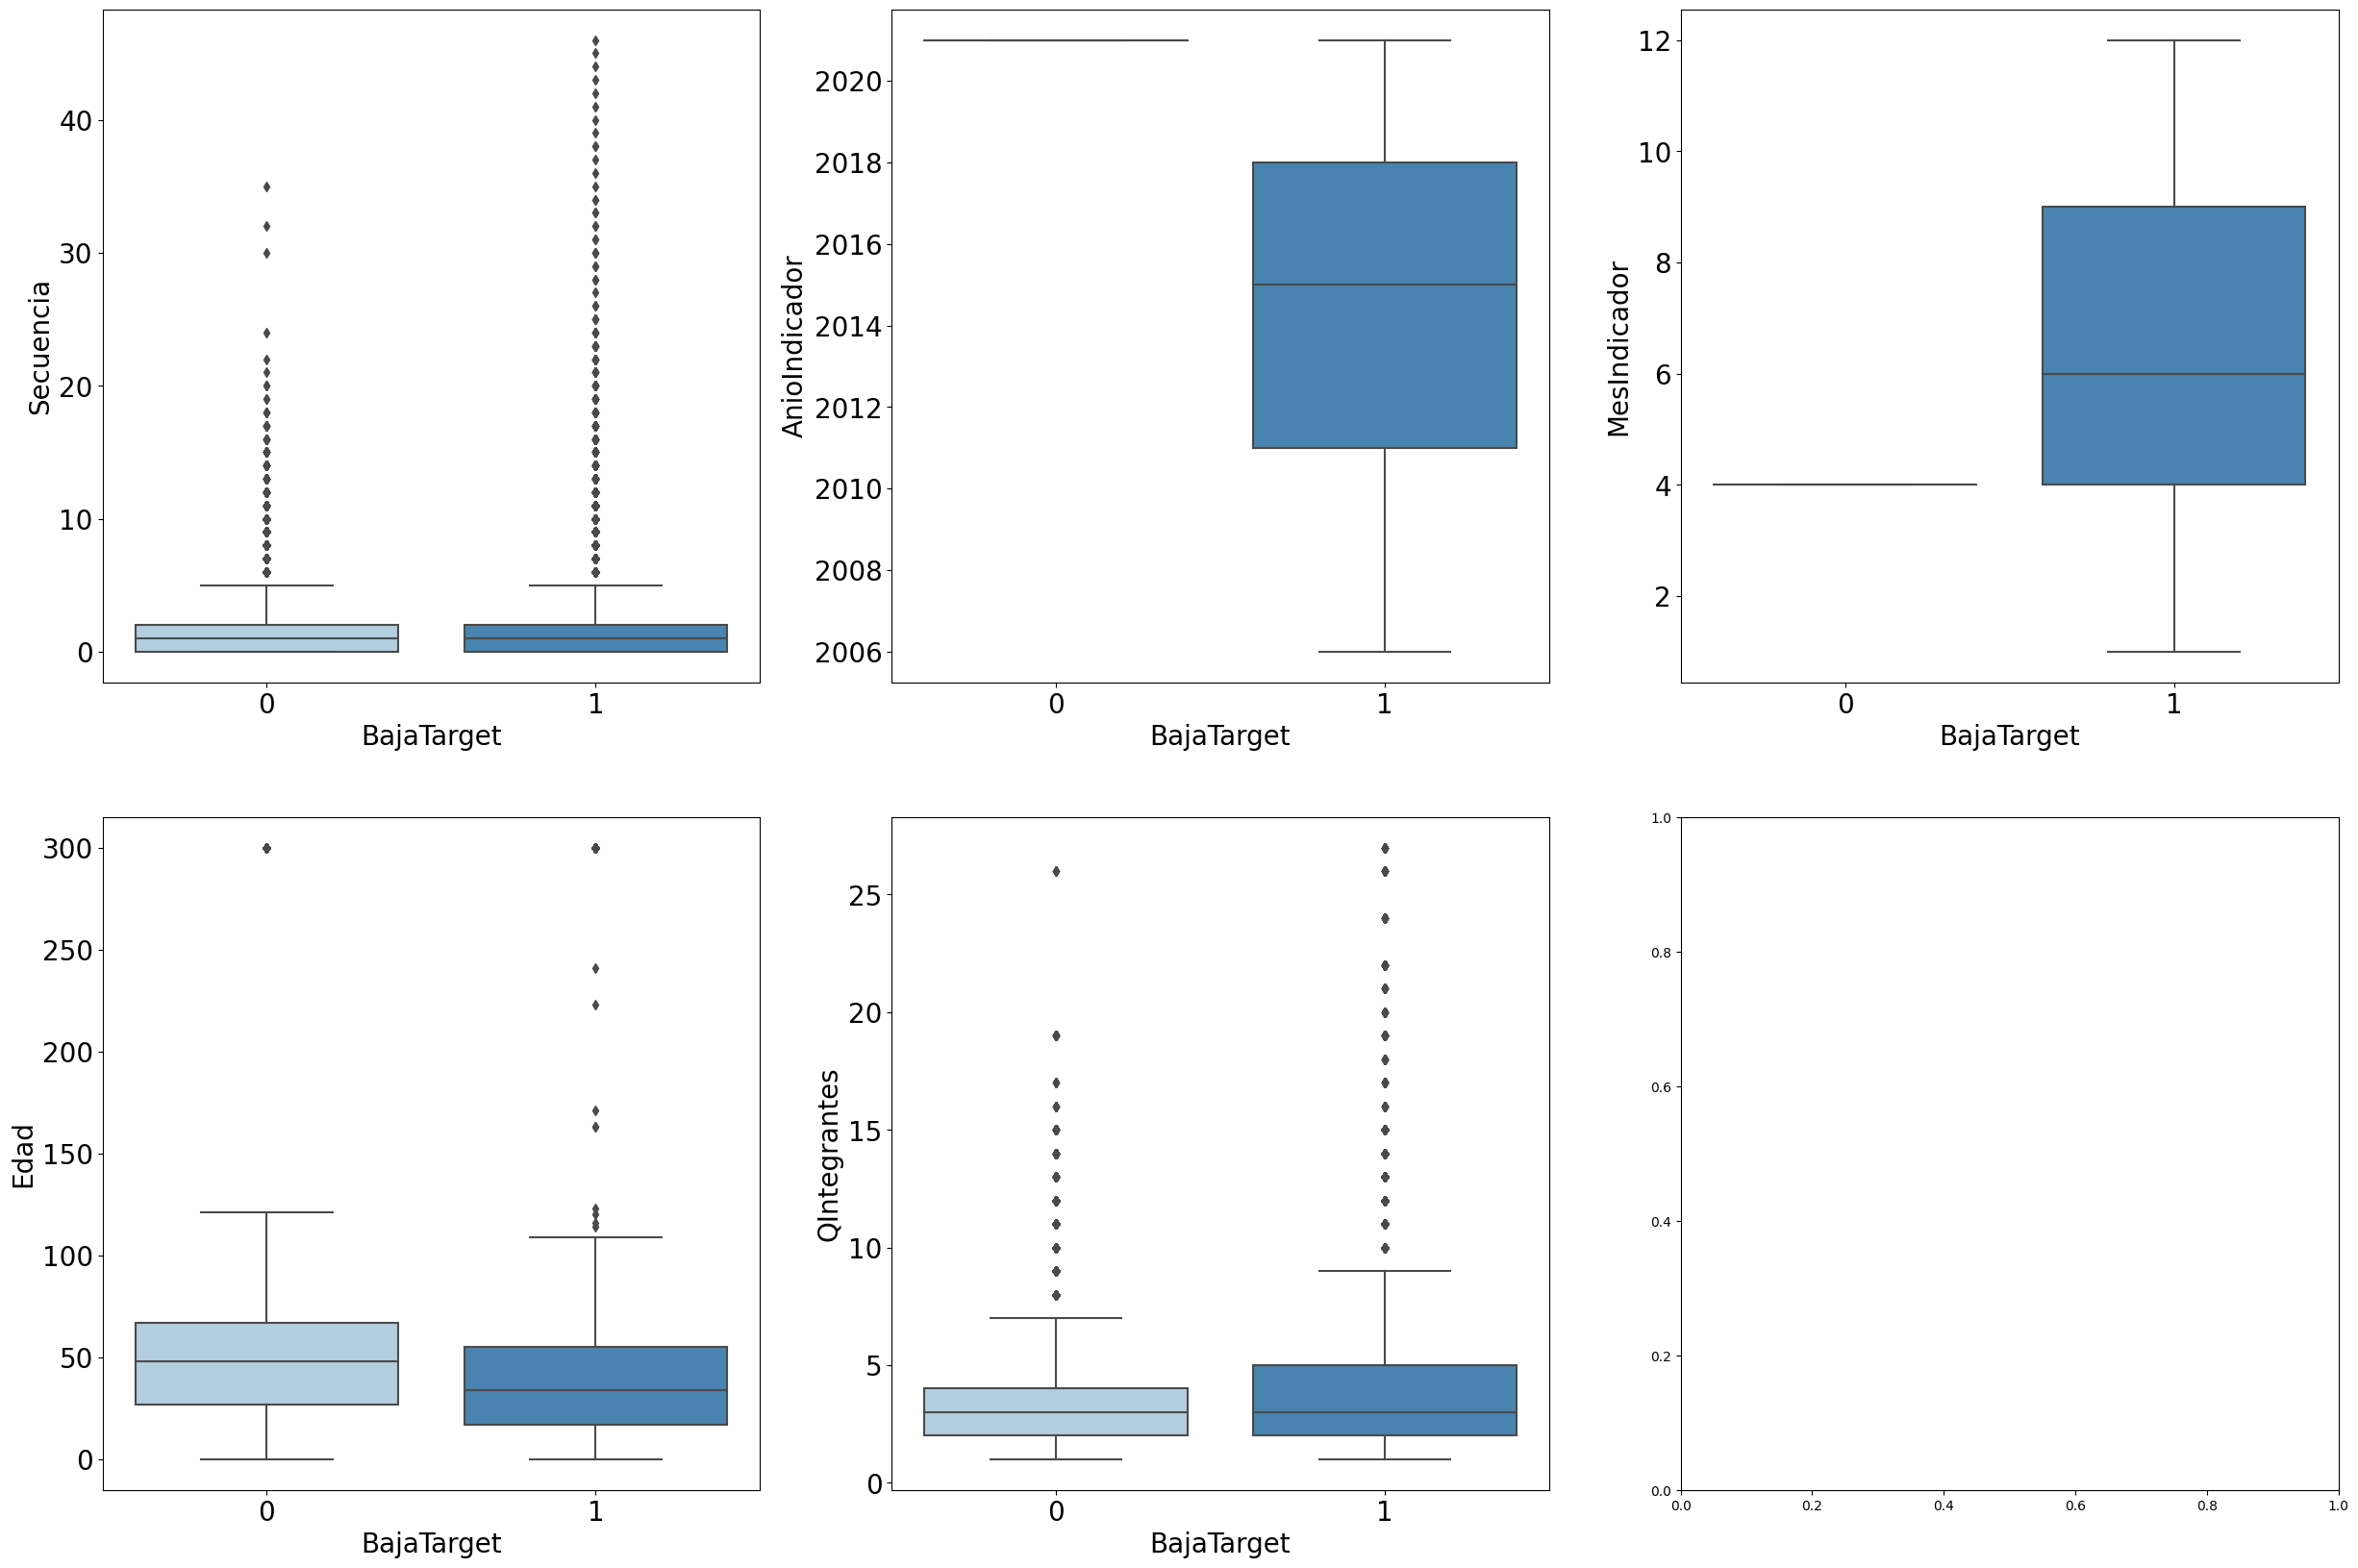

In [29]:
numeric_features_func(num_cols[0:5], 'BajaTarget' , df, 3)

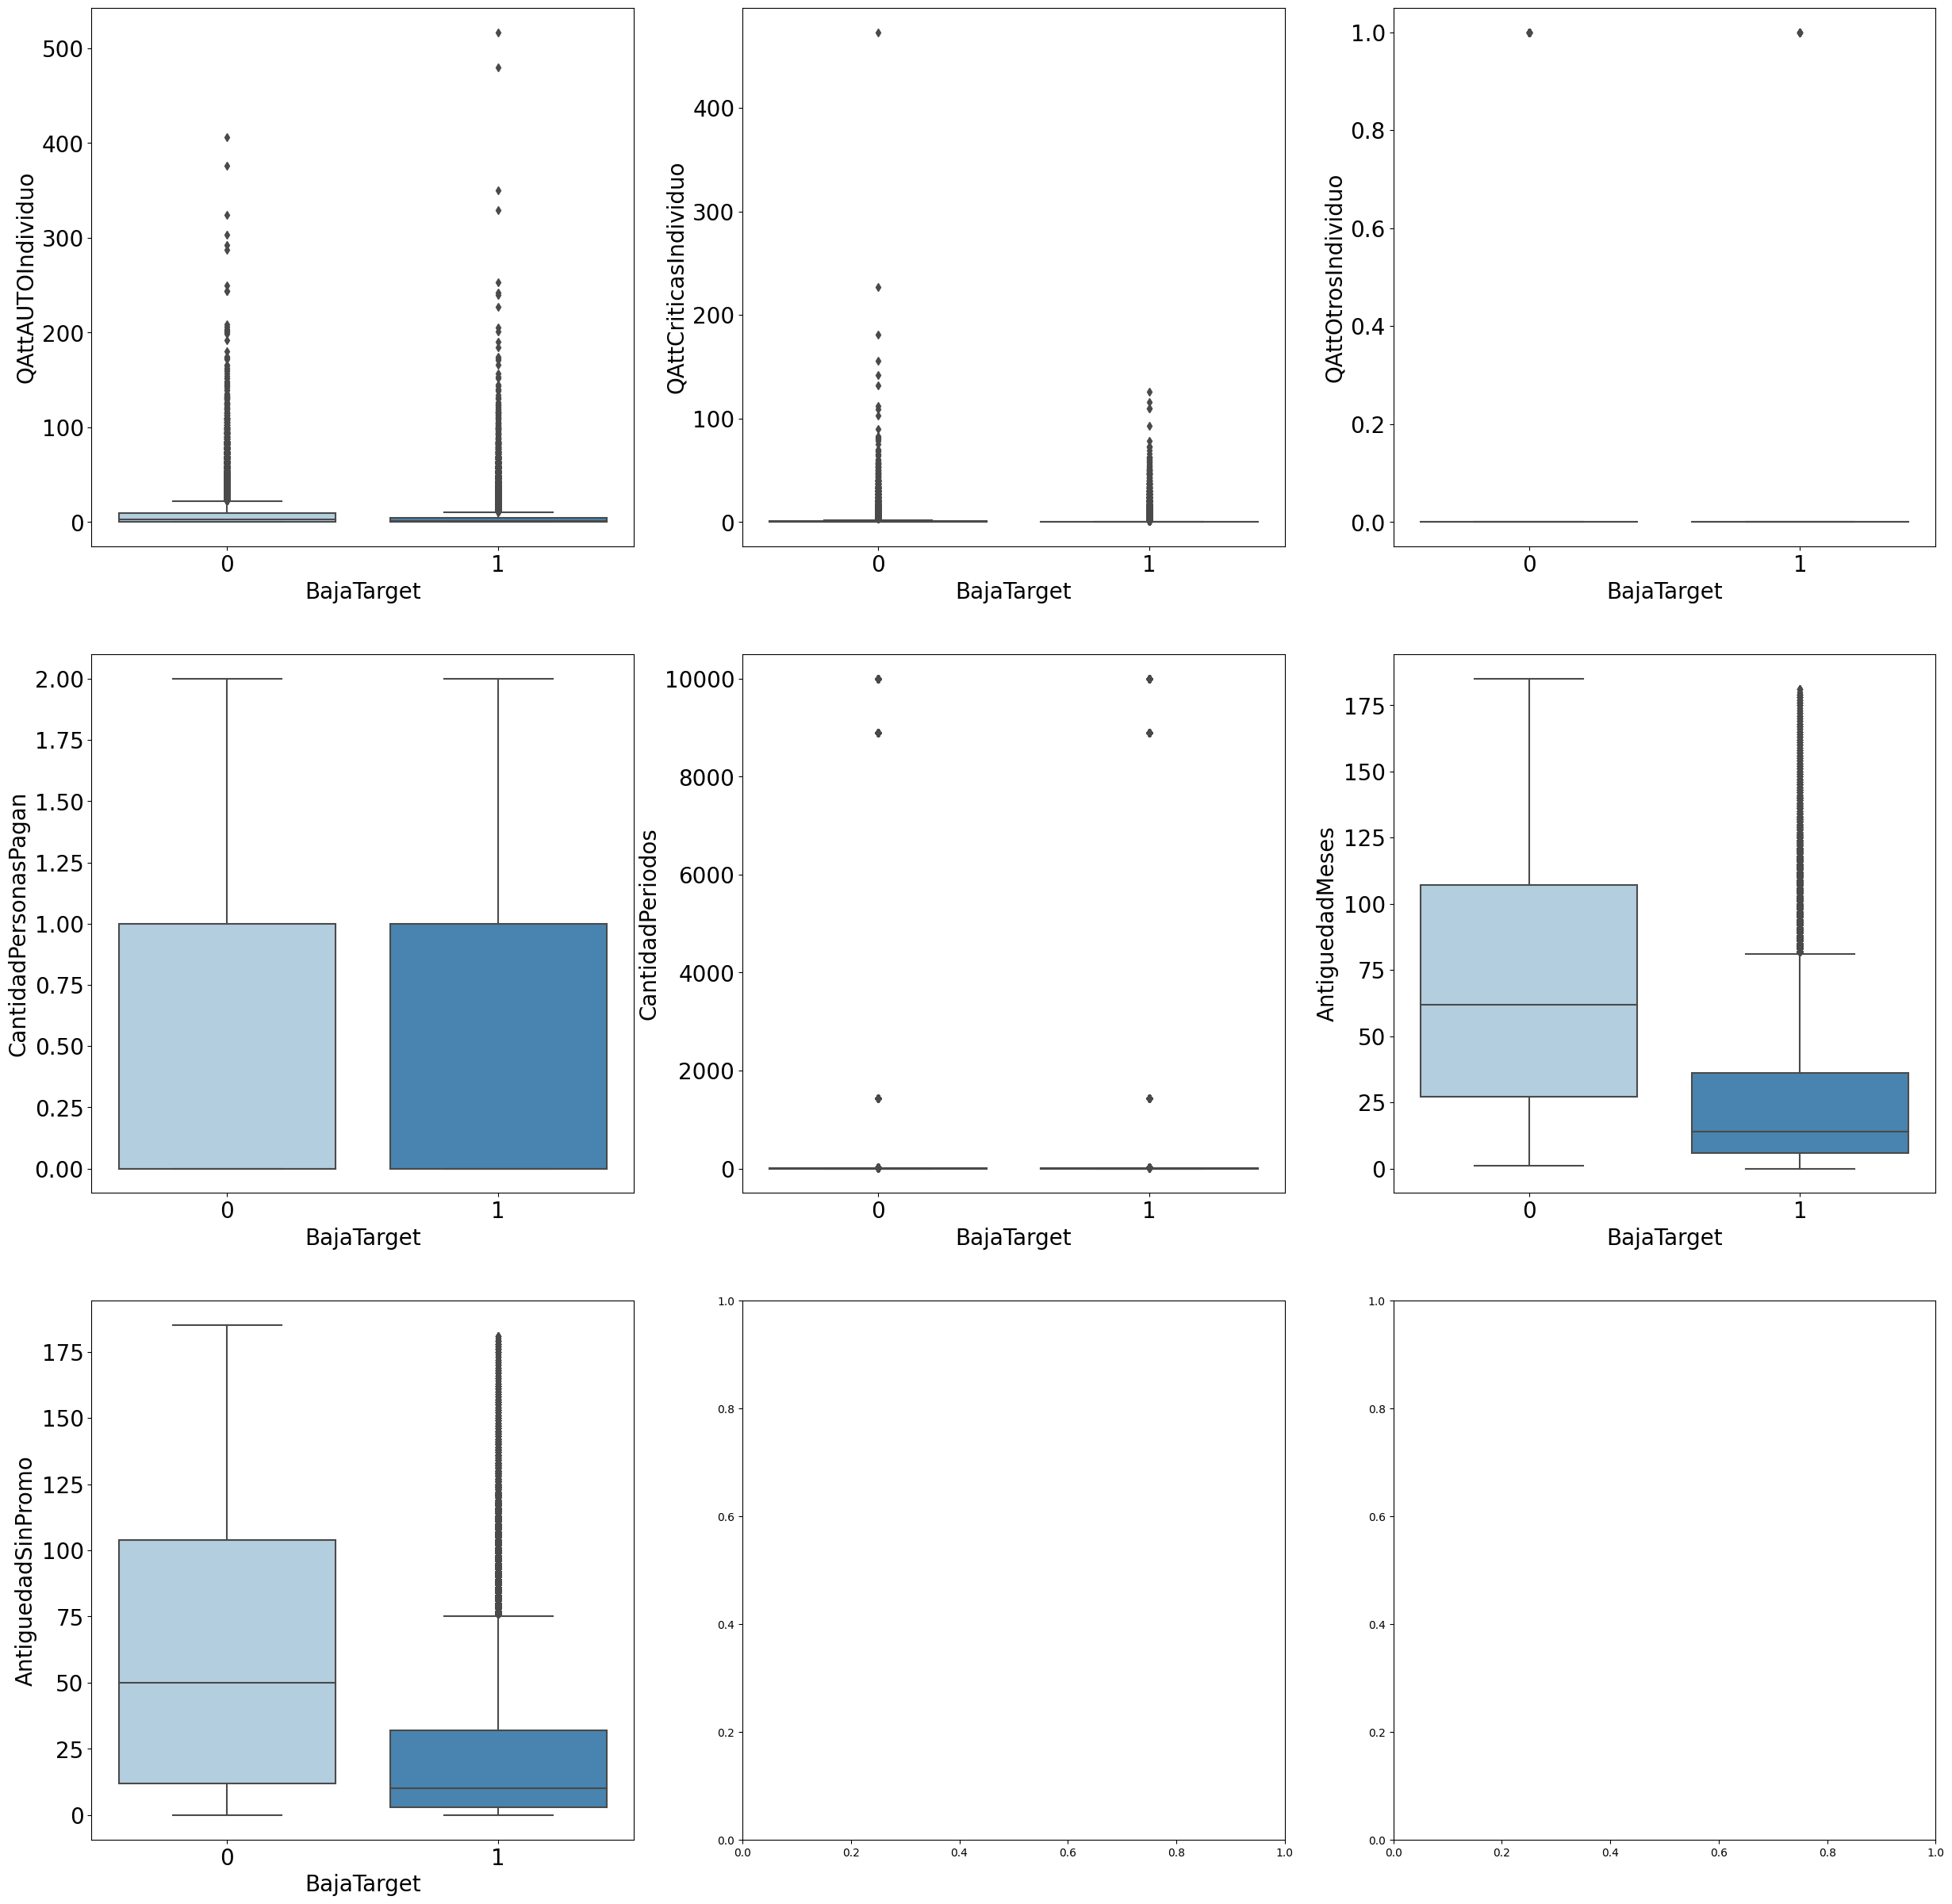

In [30]:
numeric_features_func(num_cols[5:], 'BajaTarget' , df, 3)

In [11]:
import math

In [12]:
df['Edad'] = np.where(df['Edad']>100,math.ceil(df['Edad'].mean()),df['Edad'])

In [13]:
df['CantidadPeriodos'] = np.where(df['CantidadPeriodos']>100,math.ceil(df['CantidadPeriodos'].median()),df['CantidadPeriodos'])

In [14]:
df['CantidadPeriodos'].unique()

array([0.0, 12.0, 9.0, 6.0, 4.0, 1.0, 3.0, 2.0, 5.0, 24.0, 18.0, 8.0,
       15.0], dtype=object)

In [58]:
df.describe().T

count         mean        std     min     25%  \
Secuencia              304337.0     1.485304   1.828241     0.0     0.0   
AnioIndicador          304337.0  2016.773928   4.476828  2006.0  2013.0   
MesIndicador           304337.0     5.563809   3.002197     1.0     4.0   
QIntegrantes           304337.0     3.587273   2.130944     1.0     2.0   
QAttAUTOIndividuo      304337.0     4.767422   9.564825     0.0     0.0   
QAttCriticasIndividuo  304337.0      0.70141   2.753228     0.0     0.0   
QAttOtrosIndividuo     304337.0     0.000273   0.016512     0.0     0.0   
CantidadPersonasPagan  304337.0     0.344963    0.47642     0.0     0.0   
AntiguedadMeses        304337.0    40.684048  41.390259     0.0     9.0   
AntiguedadSinPromo     304337.0    35.579098  42.242089     0.0     4.0   

                          50%     75%     max  
Secuencia                 1.0     2.0    46.0  
AnioIndicador          2018.0  2021.0  2021.0  
MesIndicador              4.0     8.0    12.0  
QIntegrantes              3.0     5.0    27.0  
QAttAUTOIndividuo         1.0     5.0   517.0  
QAttCriticasIndividuo     0.0     0.0   473.0  
QAttOtrosIndividuo        0.0     0.0     1.0  
CantidadPersonasPagan     0.0     1.0     2.0  
AntiguedadMeses          23.0    62.0   185.0  
AntiguedadSinPromo       17.0    55.0   185.0

In [15]:
y = df['BajaTarget']
df=df.drop(columns=['BajaTarget'])
df.head()

Secuencia CodigoDeSucursal  AnioIndicador  MesIndicador TipoAfiliacion  \
0        1.0                2         2021.0           4.0     Voluntario   
1        1.0                2         2021.0           4.0     Voluntario   
2        1.0                2         2009.0           9.0     Voluntario   
3        0.0                2         2009.0           1.0     Individual   
4        0.0                1         2021.0           4.0     Voluntario   

  DescripcionDeSexo EstadoMesIndicadores              Convenio  \
0          Femenino               Activo                 SUOEM   
1         Masculino               Activo                  UEPC   
2         Masculino           Suspendido                 SUOEM   
3          Femenino           Suspendido           SinConvenio   
4          Femenino               Activo  AMR MUTUAL AFILIADOS   

  DescripcionDeTipoDePago DescripcionDeInstitucionDeCobro  ...  \
0                Convenio                        Convenio  ...   
1                Convenio                        Convenio  ...   
2                Convenio                        Convenio  ...   
3          Débito tarjeta        TARJETA NARANJA- CORDOBA  ...   
4                Convenio                        Convenio  ...   

  ISinExpCriticas GSoloAttBanales GSoloAttCr_ticas  GSinAtenciones  \
0               N               N                N               N   
1               N               N                S               N   
2               S               S                N               N   
3               S               N                N               S   
4               S               N                N               N   

   GConAttAutoyCriticas  GSinExpAuto GSinExpCriticas AntiguedadMeses  \
0                     S            N               N           127.0   
1                     N            S               N            36.0   
2                     N            N               S            14.0   
3                     N            S               S             6.0   
4                     S            N               N           127.0   

   AntiguedadSinPromo  EstadoMora  
0               127.0      Activo  
1                36.0      Activo  
2                14.0  Suspendido  
3                 0.0  Suspendido  
4               127.0      Activo  

[5 rows x 36 columns]

In [16]:
y

0         0
1         0
2         1
3         1
4         0
         ..
304332    1
304333    1
304334    1
304335    1
304336    1
Name: BajaTarget, Length: 304337, dtype: object

In [ ]:
### Hacer todas las transaformaciones necesarias juntas con ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [18]:
le=LabelEncoder()
df['Convenio']=le.fit_transform(df['Convenio'])
df['DescripcionDeInstitucionDeCobro']=le.fit_transform(df['DescripcionDeInstitucionDeCobro'])


In [22]:


# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las columnas cualitativas
# Para mantener las columnas a las que no se les aplica ninguna transformación se tiene que indicar remainder='passthrough'.
num_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

label_cols = df[['Convenio', 'DescripcionDeInstitucionDeCobro']].columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns


sublist=[x for x in cat_cols if x not in label_cols]
cat_cols=df[sublist].columns



preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), num_cols),
                    ('onehot', OneHotEncoder(drop='first'), cat_cols)
                    ],
                    remainder='passthrough')

In [26]:
data_prep = preprocessor.fit_transform(df)
data_prep=data_prep.toarray() 

In [27]:
data_prep.shape

(304337, 152)

In [28]:
# Convertir el output en dataframe y añadir el nombre de las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, encoded_cat])

data = pd.DataFrame(data_prep, columns=labels)

data.head()

Secuencia  AnioIndicador  MesIndicador  Convenio  \
0  -0.265449       0.943990     -0.520889  0.598617   
1  -0.265449       0.943990     -0.520889  0.743549   
2  -0.265449      -1.736484      1.144561  0.598617   
3  -0.812424      -1.736484     -1.520159  0.611792   
4  -0.812424       0.943990     -0.520889 -2.392271   

   DescripcionDeInstitucionDeCobro  QIntegrantes  QAttAUTOIndividuo  \
0                        -0.670884     -0.744870           0.547066   
1                        -0.670884     -0.275593          -0.498434   
2                        -0.670884      0.193683          -0.498434   
3                         1.458099     -0.744870          -0.498434   
4                        -0.670884     -0.275593          -0.289334   

   QAttCriticasIndividuo  QAttOtrosIndividuo  CantidadPersonasPagan  ...  \
0               0.471662           -0.016517              -0.724074  ...   
1               0.108451           -0.016517              -0.724074  ...   
2              -0.254760           -0.016517              -0.724074  ...   
3              -0.254760           -0.016517               1.374916  ...   
4              -0.254760           -0.016517              -0.724074  ...   

   ISinExpAuto_S  ISinExpCriticas_S  GSoloAttBanales_S  GSoloAttCr_ticas_S  \
0            0.0                0.0                0.0                 0.0   
1            1.0                0.0                0.0                 1.0   
2            1.0                1.0                1.0                 0.0   
3            1.0                1.0                0.0                 0.0   
4            0.0                1.0                0.0                 0.0   

   GSinAtenciones_S  GConAttAutoyCriticas_S  GSinExpAuto_S  GSinExpCriticas_S  \
0               0.0                     1.0            0.0                0.0   
1               0.0                     0.0            1.0                0.0   
2               0.0                     0.0            0.0                1.0   
3               1.0                     0.0            1.0                1.0   
4               0.0                     1.0            0.0                0.0   

   EstadoMora_Campaña  EstadoMora_Suspendido  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    1.0  
3                 0.0                    1.0  
4                 0.0                    0.0  

[5 rows x 152 columns]

In [29]:
from sklearn.decomposition import PCA

In [31]:
#PCA
pca=PCA() 
#Se puede definir la cantidad de componentes Ej:pca=PCA(n_components=3)
#Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
X_pca=pca.fit_transform(data) 

In [32]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.1914962  0.30625608 0.39871378 0.47051316 0.53021151 0.58804561
 0.63849108 0.68315697 0.72331536 0.75958974 0.78953136 0.81738783
 0.8392648  0.85443412 0.86842071 0.87996053 0.88930212 0.89786111
 0.90504322 0.91083353 0.91564374 0.91908974 0.92230739 0.92531936
 0.92824926 0.93085419 0.93269954 0.93440882 0.93602441 0.93762071
 0.93880688 0.93994903 0.94108052 0.94208725 0.94307896 0.94403434
 0.94496946 0.94589404 0.94678278 0.947639   0.94848419 0.94932174
 0.95015433 0.95098095 0.95180057 0.95261862 0.95343189 0.95423807
 0.95503893 0.95583665 0.95663383 0.95742597 0.95821538 0.95900331
 0.95978155 0.96055453 0.96132119 0.96208041 0.96283489 0.96358626
 0.96432588 0.96505278 0.96577752 0.96649676 0.96720076 0.96789984
 0.9685936  0.96928394 0.96997233 0.97065674 0.97133397 0.97200892
 0.97268246 0.9733542  0.97402464 0.9746903  0.97535117 0.97600894
 0.97666396 0.97731377 0.97795862 0.97860032 0.97923648 0.97986739
 0.98049733 0.98112

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

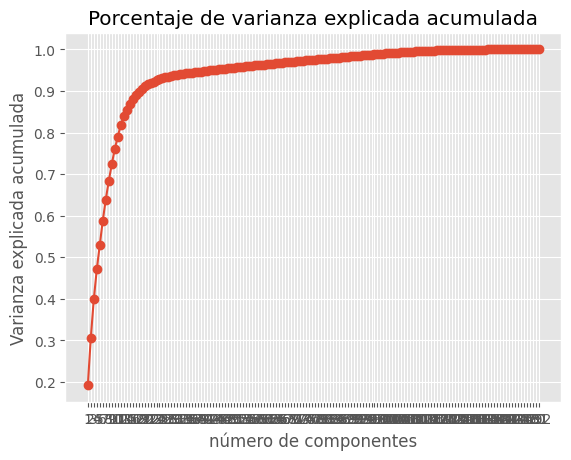

In [35]:
#Grafico varianza explicada acumulada
plt.plot(np.arange(len(data.columns)) + 1,prop_varianza_acum,marker = 'o')
plt.xticks(np.arange(pca.n_components_) + 1)
plt.xlabel('número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Porcentaje de varianza explicada acumulada');

In [39]:

#PCA
pca=PCA(n_components=12) 
X_pca=pca.fit_transform(data) 

In [40]:
X_pca

array([[ 3.39470997,  0.67596285, -0.81802374, ..., -0.72754917,
         0.01598626, -0.24691132],
       [ 0.29772631, -0.35050344, -0.77657128, ..., -0.49818605,
         0.45292109, -0.54448135],
       [-1.72020649, -1.38074854,  0.20682564, ..., -0.07807991,
        -0.23798334,  0.71503336],
       ...,
       [ 1.09647525, -0.93343056,  0.87172962, ..., -1.18581691,
        -0.86190998,  0.26610698],
       [ 1.48478932,  0.92454059,  0.6061827 , ...,  0.12827905,
         1.2293236 ,  0.73607108],
       [-1.17054724, -0.17327525,  0.4459058 , ..., -1.05606864,
        -0.5127353 , -0.29527317]])

In [41]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.1914962  0.30625608 0.39871378 0.47051316 0.53021151 0.58804561
 0.63849108 0.68315697 0.72331536 0.75958974 0.78953136 0.81738783]


In [44]:
##Visualizar los eigenvectors
pd.DataFrame(
    data    = pca.components_,
    columns = data.columns,
    index=['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
)

Secuencia  AnioIndicador  MesIndicador  Convenio  \
PC1    0.034406       0.304004     -0.163426 -0.190946   
PC2   -0.180952       0.128875     -0.074202  0.452125   
PC3    0.635265      -0.162454      0.123533  0.129494   
PC4   -0.202468      -0.502667      0.551631 -0.020807   
PC5    0.069539       0.157835     -0.253108 -0.168479   
PC6   -0.005865      -0.000827     -0.004003 -0.005806   
PC7   -0.090281       0.082589      0.069085 -0.063727   
PC8    0.005621      -0.333910     -0.713834  0.074789   
PC9    0.041516      -0.062871      0.013807 -0.735972   
PC10   0.226367       0.131940      0.105160 -0.016648   
PC11   0.266470       0.335878      0.165970  0.123288   
PC12  -0.317239      -0.273957     -0.129120 -0.051933   

      DescripcionDeInstitucionDeCobro  QIntegrantes  QAttAUTOIndividuo  \
PC1                         -0.183017      0.039232           0.335119   
PC2                          0.498124     -0.118218           0.188480   
PC3                          0.098775      0.667159           0.158552   
PC4                          0.010252     -0.139292           0.237660   
PC5                         -0.254889      0.068121           0.050627   
PC6                         -0.026106     -0.009340           0.027935   
PC7                         -0.307328     -0.120325           0.190297   
PC8                          0.173423     -0.078131           0.140764   
PC9                          0.486535     -0.031077          -0.055869   
PC10                         0.061734     -0.211652           0.605194   
PC11                         0.125539     -0.168581          -0.511854   
PC12                        -0.123918      0.343930          -0.195962   

      QAttCriticasIndividuo  QAttOtrosIndividuo  CantidadPersonasPagan  ...  \
PC1                0.210711            0.011583              -0.201423  ...   
PC2                0.232223            0.007242               0.405459  ...   
PC3                0.048370            0.003743               0.025386  ...   
PC4                0.402744           -0.014399              -0.305916  ...   
PC5                0.567471           -0.040383               0.230604  ...   
PC6                0.019354            0.997359               0.007388  ...   
PC7               -0.028447           -0.049315               0.240373  ...   
PC8                0.102912           -0.013476              -0.452536  ...   
PC9                0.029559            0.007215               0.167872  ...   
PC10               0.108923           -0.017427               0.076874  ...   
PC11               0.485826            0.007936              -0.287138  ...   
PC12               0.370116            0.007612               0.308826  ...   

      ISinExpAuto_S  ISinExpCriticas_S  GSoloAttBanales_S  GSoloAttCr_ticas_S  \
PC1       -0.132220          -0.104681          -0.024584           -0.004170   
PC2       -0.082242          -0.100436          -0.042549            0.000459   
PC3       -0.079032          -0.016199           0.022144           -0.006775   
PC4       -0.039338          -0.110451          -0.063942            0.000171   
PC5        0.133766          -0.144931          -0.217360            0.013770   
PC6       -0.006094          -0.001908           0.004553           -0.000606   
PC7       -0.319166           0.016423           0.257623           -0.016901   
PC8       -0.081467           0.016204           0.096094           -0.006737   
PC9       -0.057413          -0.011451           0.022556           -0.000563   
PC10       0.130559           0.211393           0.179471           -0.013874   
PC11      -0.068133           0.043620           0.189094            0.003473   
PC12       0.020765           0.175807           0.254348           -0.011735   

      GSinAtenciones_S  GConAttAutoyCriticas_S  GSinExpAuto_S  \
PC1          -0.090876                0.119630      -0.095046   
PC2          -0.073045                0.115135      -0.072586   
PC3        

In [45]:
## Datset final con las CP calculadas
X_pca_df=pd.DataFrame(X_pca,columns=['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [46]:
data["BajaTarget"]=y

data.reset_index(inplace=True)
data_final=pd.concat([data,X_pca_df],axis=1)

In [67]:
def pca_graficos(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.scatterplot( x="PC1", y=col, data=data, hue=x_col, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.scatterplot( x="PC1", y=col, data=data, hue=x_col, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('PC1', fontsize=20)

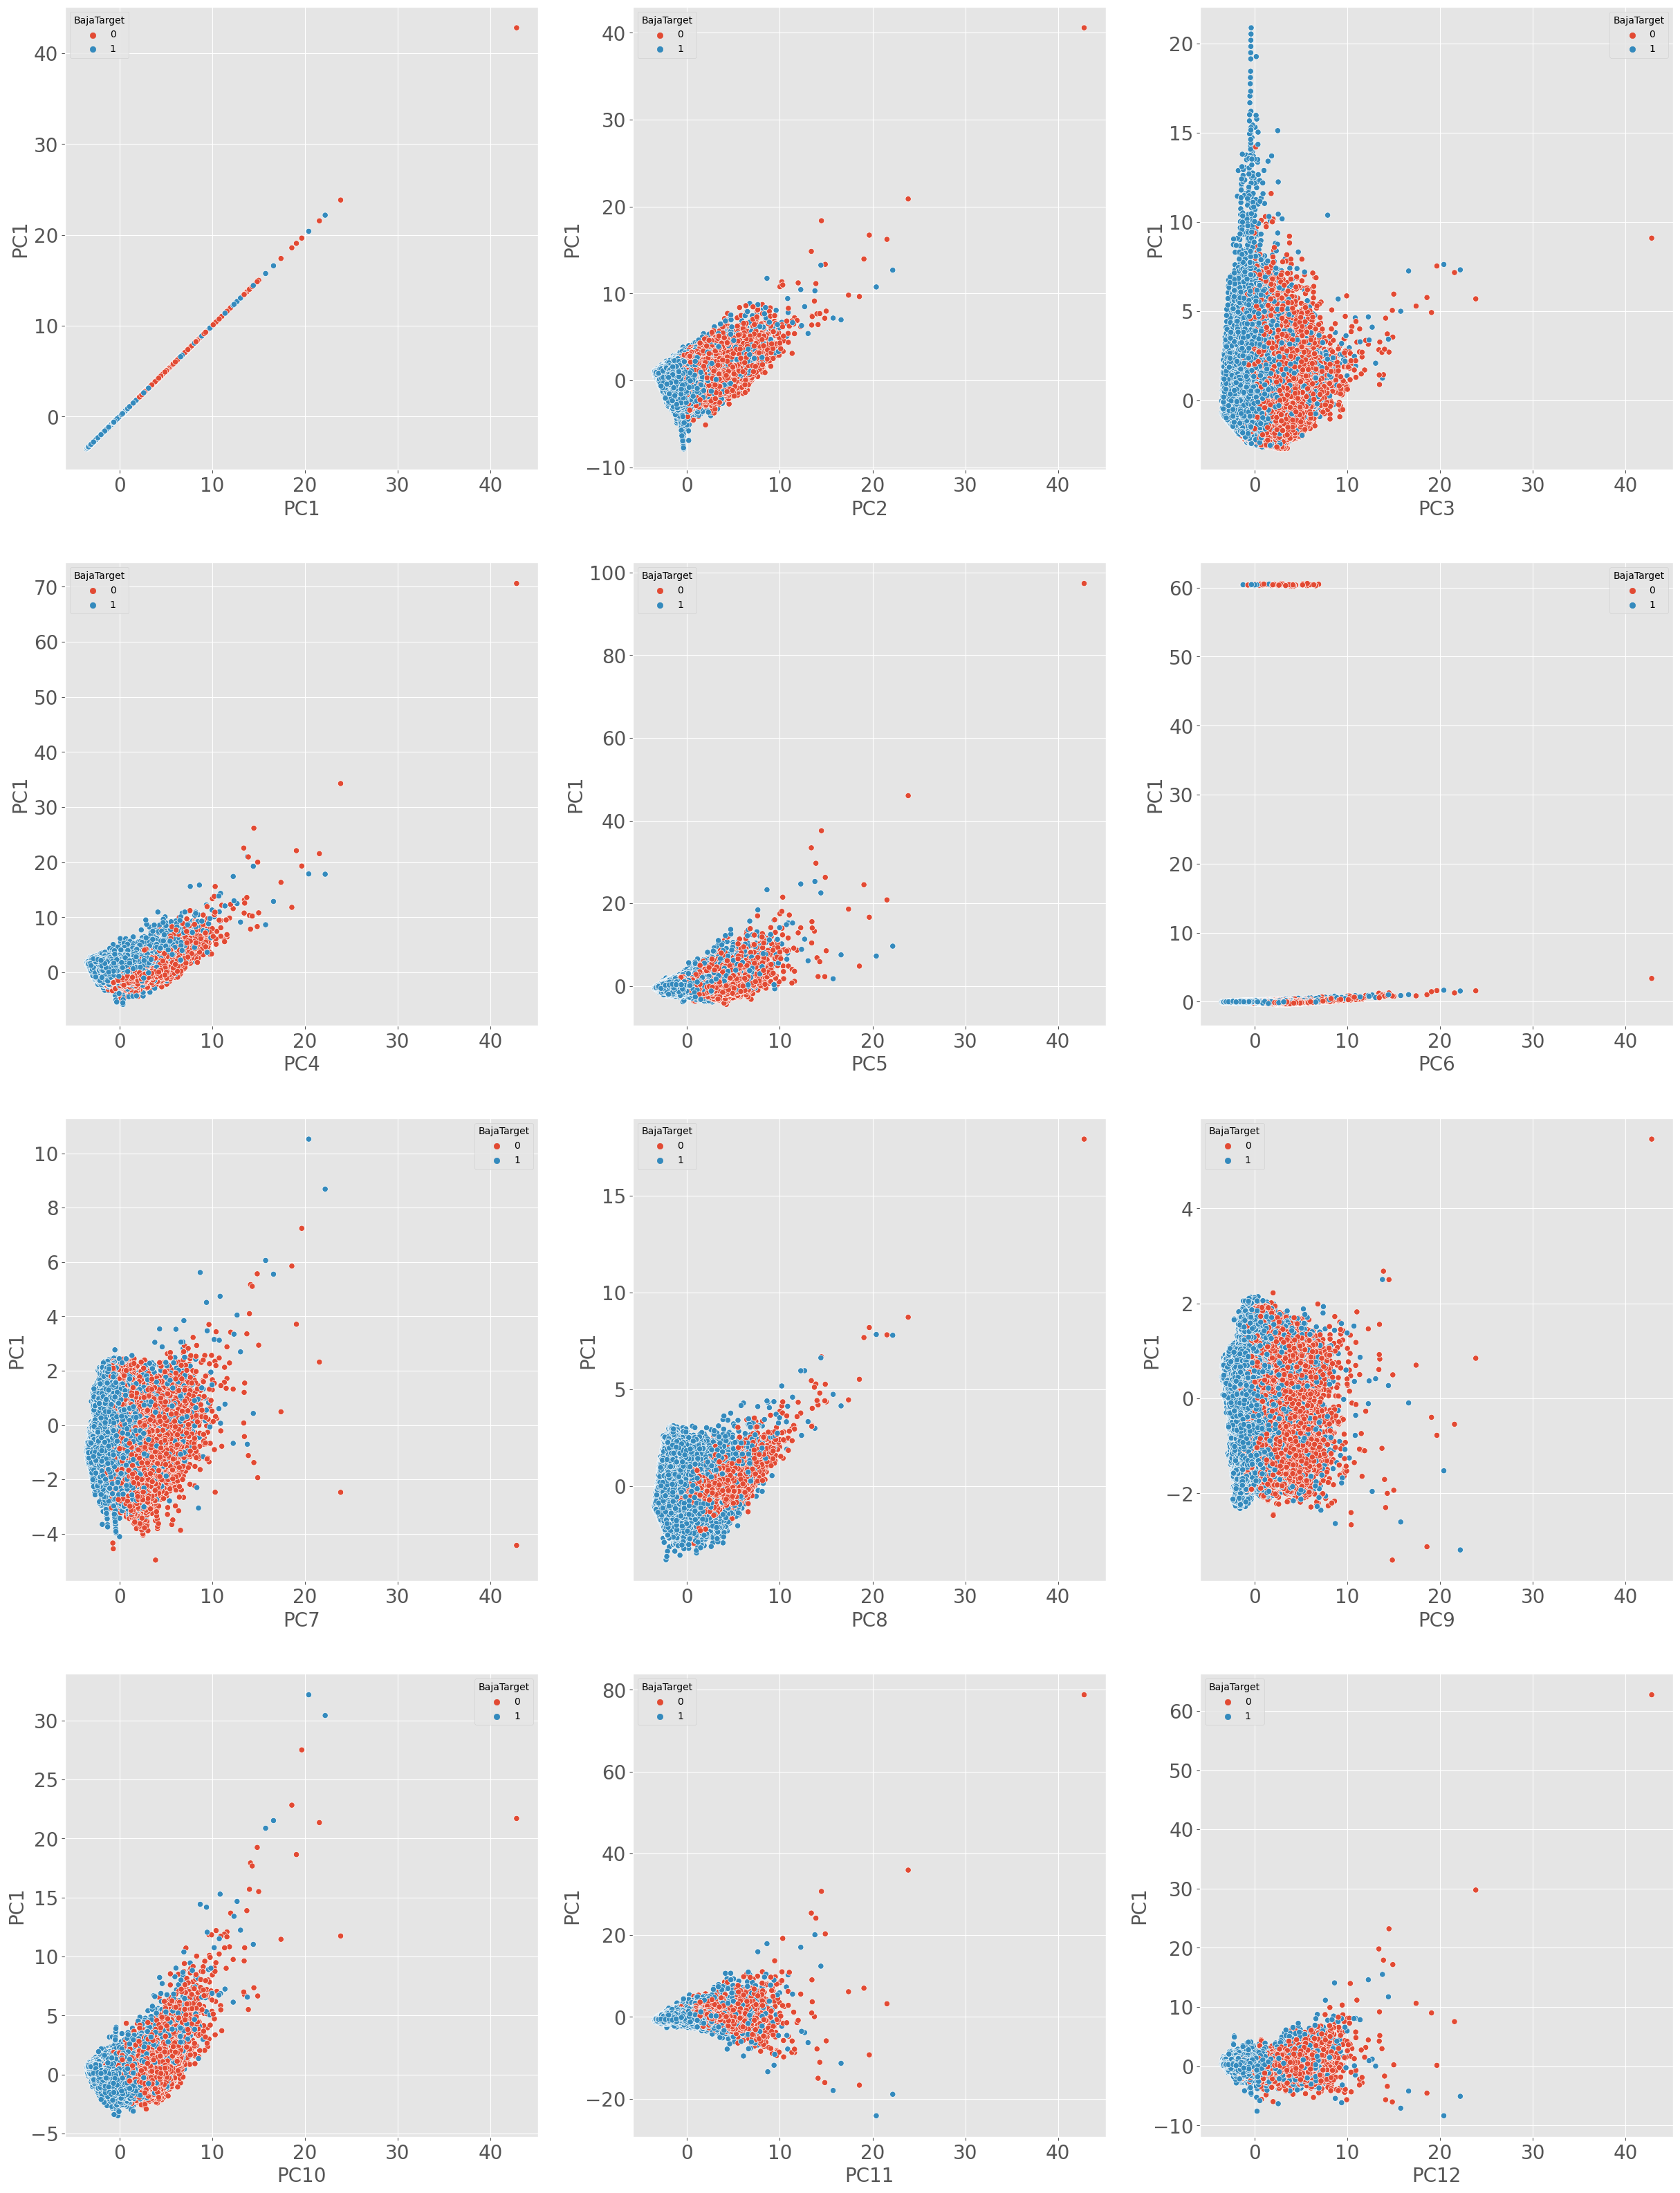

In [68]:
componentes = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
pca_graficos(componentes,'BajaTarget',data_final,3)

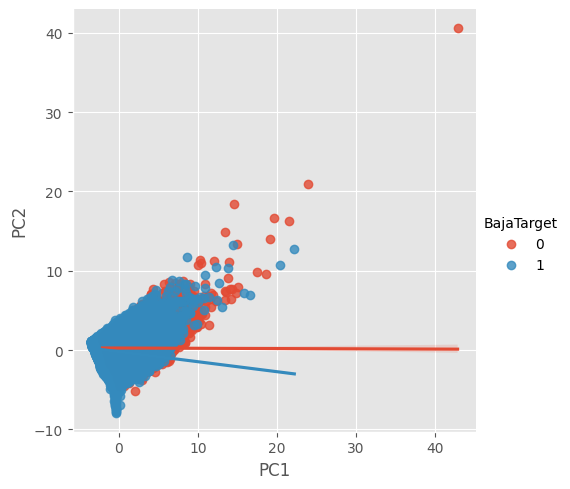

In [69]:
#Grafico
sns.lmplot( x="PC1", y="PC2", data=data_final, hue='BajaTarget')